**Denise Rappold - DSP Sommersemester 2024 University of Stuttgart**

note: some code might be redundant but makes output more readable, this could be removed for better efficiency

abbreviations used: DataFrame: df

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


import pickle # was used during analysis to store some intermediate results

In [2]:
# set visualization style, so visualizations will mostly be similar
import seaborn as sns

sns.set(style="whitegrid")

In [3]:
# file paths
artist_path = './beatport_data/bp_artist.csv'
artist_media_path = './beatport_data/bp_artist_media.csv'
artist_release_path = './beatport_data/bp_artist_release.csv'
artist_track_path = './beatport_data/bp_artist_track.csv'
genre_path = './beatport_data/bp_genre.csv'
key_path = './beatport_data/bp_key.csv'
label_path = './beatport_data/bp_label.csv'
label_artist_path = './beatport_data/bp_label_artist.csv'
label_media_path = './beatport_data/bp_label_media.csv'
release_path = './beatport_data/bp_release.csv'
release_media_path = './beatport_data/bp_release_media.csv'
subgenre_path = './beatport_data/bp_subgenre.csv'
track_path = './beatport_data/bp_track.csv'
track_media_path = './beatport_data/bp_track_media.csv'

note: read df_track seperately in chunks because of its size

In [4]:
# read each CSV file into a DataFrame, already convert columns describing a date to datetime
df_artist = pd.read_csv(artist_path, parse_dates=['updated_on'], engine='c')
df_artist_media_path = pd.read_csv(artist_media_path, parse_dates=['updated_on'], engine='c')
df_artist_release = pd.read_csv(artist_release_path, parse_dates=['updated_on'], engine='c')
df_artist_track = pd.read_csv(artist_track_path, parse_dates=['updated_on'], engine='c')
df_genre = pd.read_csv(genre_path, parse_dates=['updated_on'], engine='c')
df_key = pd.read_csv(key_path, engine='c')
df_label = pd.read_csv(label_path, parse_dates=['updated_on'], engine='c')
df_label_artist = pd.read_csv(label_artist_path, parse_dates=['updated_on'], engine='c')
df_label_media = pd.read_csv(label_media_path, parse_dates=['updated_on'], engine='c')
df_release = pd.read_csv(release_path, parse_dates=['release_date', 'updated_on'], engine='c')
df_release_media = pd.read_csv(release_media_path, parse_dates=['updated_on'], engine='c')
df_subgenre = pd.read_csv(subgenre_path, parse_dates=['updated_on'], engine='c')
#df_track = pd.read_csv(track_path, parse_dates=['release_date', 'updated_on'], low_memory= False)
df_track_media = pd.read_csv(track_media_path, parse_dates=['updated_on'], engine='c')

In [5]:
# store all dfs in a dictionary
dataframes = {
    'df_artist': df_artist,
    'df_artist_media_path': df_artist_media_path,
    'df_artist_release': df_artist_release,
    'df_artist_track': df_artist_track,
    'df_genre': df_genre,
    'df_key': df_key,
    'df_label': df_label,
    'df_label_artist': df_label_artist,
    'df_label_media': df_label_media,
    'df_release': df_release,
    'df_release_media': df_release_media,
    'df_subgenre': df_subgenre,
    'df_track_media': df_track_media
    #'df_track': df_track
}

idea: in order to have more compact code, general data cleansing steps are performed on all DataFrames in the dictionary using a for-loop

In [6]:
# define chunk size, tested multiple times, to find out which size might work best
chunksize = 100000  

# store chunks processed chunks in list
processed_chunks = []

for chunk in pd.read_csv('./beatport_data/bp_track.csv', parse_dates=['release_date','updated_on'], low_memory=False, chunksize=chunksize):
    processed_chunks.append(chunk)

# concat all processed chunks in one df
df_all_chunks = pd.concat(processed_chunks, ignore_index=True)

In [7]:
#count number of entries per df

for key, df in dataframes.items():
    print(f"{key} has {len(df)} entries in total.")



df_artist has 824763 entries in total.
df_artist_media_path has 824763 entries in total.
df_artist_release has 8595817 entries in total.
df_artist_track has 14637342 entries in total.
df_genre has 32 entries in total.
df_key has 34 entries in total.
df_label has 78283 entries in total.
df_label_artist has 3458219 entries in total.
df_label_media has 78283 entries in total.
df_release has 2598492 entries in total.
df_release_media has 2598492 entries in total.
df_subgenre has 74 entries in total.
df_track_media has 10685331 entries in total.


In [9]:
total_sum = sum(df.select_dtypes(include='number').sum().sum() for df in dataframes.values())
print(f"Total sum across all DataFrames: {total_sum:,}".replace(",", "."))

Total sum across all DataFrames: 566.747.751.534.406.0


In [10]:
total_cells = sum(df.size for df in dataframes.values())
print(f"Total Cells: {total_cells}")


Total Cells: 202719065


In [7]:
# add key 'df_track' and value in dataframe
dataframes['df_track'] = df_all_chunks 

# check if df 'df_track' is added to dictionary
print(dataframes.keys())

dict_keys(['df_artist', 'df_artist_media_path', 'df_artist_release', 'df_artist_track', 'df_genre', 'df_key', 'df_label', 'df_label_artist', 'df_label_media', 'df_release', 'df_release_media', 'df_subgenre', 'df_track_media', 'df_track'])


In [8]:
# verify conversion (during .read_csv) of 'release_date','updated_on'columns to datetime64
for name, df in dataframes.items():
    print(f"DataFrame '{name}'")
    print(df.dtypes)
    print("-" * 40)
    

DataFrame 'df_artist'
artist_id               int64
artist_name            object
artist_url             object
updated_on     datetime64[ns]
dtype: object
----------------------------------------
DataFrame 'df_artist_media_path'
artist_id                   int64
artist_img_id               int64
artist_img_uuid            object
updated_on         datetime64[ns]
dtype: object
----------------------------------------
DataFrame 'df_artist_release'
artist_id              int64
release_id             int64
updated_on    datetime64[ns]
dtype: object
----------------------------------------
DataFrame 'df_artist_track'
artist_id              int64
track_id               int64
updated_on    datetime64[ns]
is_remixer            object
dtype: object
----------------------------------------
DataFrame 'df_genre'
genre_id               int64
genre_name            object
song_count             int64
genre_url             object
updated_on    datetime64[ns]
dtype: object
----------------------------

In [9]:
# print head of each column, to get an overview
for name, df in dataframes.items():
    print(f"DataFrame {name} head: ")
    print(df.head(4))
    print("-" * 40)

DataFrame df_artist head: 
   artist_id             artist_name  \
0      31526                 Tromesa   
1     943790              Magik (UK)   
2    1027936             Abdul Raeva   
3     806738  Gerwin Van Engelenburg   

                                          artist_url          updated_on  
0                  beatport.com/artist/tromesa/31526 2023-09-14 16:19:56  
1                beatport.com/artist/magik-uk/943790 2023-09-14 16:19:56  
2            beatport.com/artist/abdul-raeva/1027936 2023-09-14 16:19:56  
3  beatport.com/artist/gerwin-van-engelenburg/806738 2023-09-14 16:19:56  
----------------------------------------
DataFrame df_artist_media_path head: 
   artist_id  artist_img_id                       artist_img_uuid  \
0      31526        5539565  0dc61986-bccf-49d4-8fad-6b147ea8f327   
1     943790       33043689  eb634b33-3621-4149-bed3-446390730ea6   
2    1027936        5539565  0dc61986-bccf-49d4-8fad-6b147ea8f327   
3     806738       29784707  4b59c9fc-4369

In [10]:
# print columns of each df to get a better overview
for name, df in dataframes.items():
    print(f"Columns in {name}: ")
    column_names = df.columns.tolist()
    for col in column_names:
        print(f"  {col:<30}")
    print("-" * 40)

Columns in df_artist: 
  artist_id                     
  artist_name                   
  artist_url                    
  updated_on                    
----------------------------------------
Columns in df_artist_media_path: 
  artist_id                     
  artist_img_id                 
  artist_img_uuid               
  updated_on                    
----------------------------------------
Columns in df_artist_release: 
  artist_id                     
  release_id                    
  updated_on                    
----------------------------------------
Columns in df_artist_track: 
  artist_id                     
  track_id                      
  updated_on                    
  is_remixer                    
----------------------------------------
Columns in df_genre: 
  genre_id                      
  genre_name                    
  song_count                    
  genre_url                     
  updated_on                    
-------------------------------------

Data Cleaning

In [11]:
# first, look for rows that have exactly the same values in each column (duplicates)
for df_name, df in dataframes.items():
    num_duplicates = len(df) - len(df.drop_duplicates(keep='first'))
    
    print(f"DataFrame '{df_name}' has {num_duplicates} duplicates.")

DataFrame 'df_artist' has 0 duplicates.
DataFrame 'df_artist_media_path' has 0 duplicates.
DataFrame 'df_artist_release' has 0 duplicates.
DataFrame 'df_artist_track' has 0 duplicates.
DataFrame 'df_genre' has 0 duplicates.
DataFrame 'df_key' has 0 duplicates.
DataFrame 'df_label' has 0 duplicates.
DataFrame 'df_label_artist' has 0 duplicates.
DataFrame 'df_label_media' has 0 duplicates.
DataFrame 'df_release' has 0 duplicates.
DataFrame 'df_release_media' has 0 duplicates.
DataFrame 'df_subgenre' has 0 duplicates.
DataFrame 'df_track_media' has 0 duplicates.
DataFrame 'df_track' has 0 duplicates.


-> no duplicates to delete.

Check for NaN values:

In [12]:
# add all dfs that contain NaN values to new dictionary
dfs_with_nans = {}

# check if the dfs contains any NaN values
for df_name, df in dataframes.items():
    
    if df.isna().sum().sum() > 0:
        dfs_with_nans[df_name] = df
        print(f"\n'{df_name}' contains NaN values in column(s) ")
        missing_values_per_column = df.isna().sum()
        for column, missing_count in missing_values_per_column.items():
            if missing_count > 0:
                print(f"  {column:<30}: {missing_count} NaN values")
        print("-" * 40)

print(f"\nDataframes with NaN values: {list(dfs_with_nans.keys())}")


'df_artist' contains NaN values in column(s) 
  artist_name                   : 3 NaN values
----------------------------------------

'df_label' contains NaN values in column(s) 
  label_name                    : 1 NaN values
----------------------------------------

'df_release' contains NaN values in column(s) 
  release_title                 : 9 NaN values
----------------------------------------

'df_track_media' contains NaN values in column(s) 
  wave_img_id                   : 15834 NaN values
  wave_img_uuid                 : 15834 NaN values
  sample_start                  : 2872 NaN values
  sample_end                    : 2872 NaN values
----------------------------------------

'df_track' contains NaN values in column(s) 
  title                         : 57 NaN values
  mix                           : 4 NaN values
  subgenre_id                   : 9969906 NaN values
  duration                      : 2632 NaN values
  duration_ms                   : 2632 NaN values
  isrc

In [11]:
for key, df in dataframes.items():
    total_rows = len(df)
    nan_counts = df.isna().sum().sum()  # total NaN cells in the whole DataFrame
    non_nan_entries = total_rows * df.shape[1] - nan_counts  # total cells minus NaNs
    print(f"{key} has {non_nan_entries} non-NaN entries in total.")


df_artist has 3299049 non-NaN entries in total.
df_artist_media_path has 3299052 non-NaN entries in total.
df_artist_release has 25787451 non-NaN entries in total.
df_artist_track has 58549368 non-NaN entries in total.
df_genre has 160 non-NaN entries in total.
df_key has 306 non-NaN entries in total.
df_label has 313131 non-NaN entries in total.
df_label_artist has 10374657 non-NaN entries in total.
df_label_media has 313132 non-NaN entries in total.
df_release has 15590943 non-NaN entries in total.
df_release_media has 10393968 non-NaN entries in total.
df_subgenre has 518 non-NaN entries in total.
df_track_media has 74759905 non-NaN entries in total.


In [13]:
# delete rows from columns with >5% missing_percentage

cleaned_dataframes = {}

for df_name, df in dfs_with_nans.items():

    #df_track_media and df_track, 'df_track_media' need to be handled individually because of its size
    if df_name in ['df_track_media', 'df_track']:
        pass
        
    else:
        missing_percent_per_column = df.isna().mean() * 100
    
        columns_to_clean = missing_percent_per_column[missing_percent_per_column < 5].index
    
        if not columns_to_clean.empty:
            df_cleaned = df.dropna(subset=columns_to_clean)
            
            #update original dfs
            dataframes[df_name] = df_cleaned
            cleaned_dataframes[df_name] = df_cleaned
            
            print(f"\nIn '{df_name}':\n" + "-" * 60)
            print(f"Columns with missing values less than 5%: {list(columns_to_clean)}")
            print(f"-> Removed rows with NaN values in columns with <5% missing values.")
        else:
            print(f"In '{df_name}': No columns with missing values below threshold. No changes made.")
        
        print("-" * 60)

print(f"\nDataframes with rows removed: {list(cleaned_dataframes.keys())}")


In 'df_artist':
------------------------------------------------------------
Columns with missing values less than 5%: ['artist_id', 'artist_name', 'artist_url', 'updated_on']
-> Removed rows with NaN values in columns with <5% missing values.
------------------------------------------------------------

In 'df_label':
------------------------------------------------------------
Columns with missing values less than 5%: ['label_id', 'label_name', 'label_url', 'updated_on']
-> Removed rows with NaN values in columns with <5% missing values.
------------------------------------------------------------

In 'df_release':
------------------------------------------------------------
Columns with missing values less than 5%: ['release_id', 'release_title', 'release_date', 'release_url', 'label_id', 'updated_on']
-> Removed rows with NaN values in columns with <5% missing values.
------------------------------------------------------------

Dataframes with rows removed: ['df_artist', 'df_labe

Note: in this case "columns with missing values <5%" includes those with 0%

Now get rid of all NaN values in order to later downcast floats/ints (reduce memory usage):

In [14]:
# check if NaN values have been removed
for df_name, df in dataframes.items():
    if df_name in ['df_track_media', 'df_track']:
        continue
    else:
        print(f'Are there still NaN values in {df_name}?\n{df.isna().any()}')
        print("-" * 40)

Are there still NaN values in df_artist?
artist_id      False
artist_name    False
artist_url     False
updated_on     False
dtype: bool
----------------------------------------
Are there still NaN values in df_artist_media_path?
artist_id          False
artist_img_id      False
artist_img_uuid    False
updated_on         False
dtype: bool
----------------------------------------
Are there still NaN values in df_artist_release?
artist_id     False
release_id    False
updated_on    False
dtype: bool
----------------------------------------
Are there still NaN values in df_artist_track?
artist_id     False
track_id      False
updated_on    False
is_remixer    False
dtype: bool
----------------------------------------
Are there still NaN values in df_genre?
genre_id      False
genre_name    False
song_count    False
genre_url     False
updated_on    False
dtype: bool
----------------------------------------
Are there still NaN values in df_key?
key_id            False
key_letter        Fa

In [15]:
# handle df_track_media individually
df_name = 'df_track_media'
df = dataframes[df_name]
missing_percent_track_media = df.isna().mean() * 100 

print(f"In {df_name}: ")

for column, missing_percent in missing_percent_track_media.items():
    if 0.0001 <= missing_percent < 5.0000:
        print(f"In column '{column:<30}': {missing_percent:>7.4f}% ≈ {missing_percent:>6.2f}% - Removing rows with missing values.")
        print()

        df = df.dropna(subset=[column])
        print(f"-> Removed missing values in '{column}'.")

dataframes[df_name] = df
print("DataFrame updated.")

In df_track_media: 
In column 'wave_img_id                   ':  0.1482% ≈   0.15% - Removing rows with missing values.

-> Removed missing values in 'wave_img_id'.
In column 'wave_img_uuid                 ':  0.1482% ≈   0.15% - Removing rows with missing values.

-> Removed missing values in 'wave_img_uuid'.
In column 'sample_start                  ':  0.0269% ≈   0.03% - Removing rows with missing values.

-> Removed missing values in 'sample_start'.
In column 'sample_end                    ':  0.0269% ≈   0.03% - Removing rows with missing values.

-> Removed missing values in 'sample_end'.
DataFrame updated.


In [16]:
# check original df
print(f"Are there still NaN values in 'df_track_media'?\n{dataframes['df_track_media'].isna().any()}")

Are there still NaN values in 'df_track_media'?
track_id         False
wave_img_id      False
wave_img_uuid    False
sample_uuid      False
sample_start     False
sample_end       False
updated_on       False
dtype: bool


Now handle df_track individually

In [17]:
# handle df_track individually
df_name = 'df_track'
df = dataframes[df_name]
missing_percent_track = df.isna().mean() * 100 

print(f"In {df_name}: ")

for column, missing_percent in missing_percent_track.items():
    if 0.0000 <= missing_percent < 5.0000:
        print(f"In column '{column:<30}': {missing_percent:>7.4f}% ≈ {missing_percent:>6.2f}% - Removing rows with missing values.")
        print()

        df = df.dropna(subset=[column])
        print(f"-> Removed missing values in '{column}'.")

dataframes[df_name] = df
print("DataFrame updated.")

In df_track: 
In column 'track_id                      ':  0.0000% ≈   0.00% - Removing rows with missing values.

-> Removed missing values in 'track_id'.
In column 'title                         ':  0.0005% ≈   0.00% - Removing rows with missing values.

-> Removed missing values in 'title'.
In column 'mix                           ':  0.0000% ≈   0.00% - Removing rows with missing values.

-> Removed missing values in 'mix'.
In column 'is_remixed                    ':  0.0000% ≈   0.00% - Removing rows with missing values.

-> Removed missing values in 'is_remixed'.
In column 'release_date                  ':  0.0000% ≈   0.00% - Removing rows with missing values.

-> Removed missing values in 'release_date'.
In column 'genre_id                      ':  0.0000% ≈   0.00% - Removing rows with missing values.

-> Removed missing values in 'genre_id'.
In column 'track_url                     ':  0.0000% ≈   0.00% - Removing rows with missing values.

-> Removed missing values in 'track

Here lower bound is 0.0000 otherwise NaN values in 'mix' would not be deleted (there are 4 NaN values out of > 10 000 000 which is statistically insignificant).

Upper bound of 5% because 5% out of 10 000 000 is 500 000, in this case it will be most efficient to delete rows with NaN.

In [18]:
# check original df
print(f"Are there still NaN values in 'df_track'?\n{dataframes['df_track'].isna().any()}")

Are there still NaN values in 'df_track'?
track_id           False
title              False
mix                False
is_remixed         False
release_date       False
genre_id           False
subgenre_id         True
track_url          False
bpm                False
duration           False
duration_ms        False
isrc               False
key_id             False
label_id           False
release_id         False
updated_on         False
is_matched_spot     True
dtype: bool


In [19]:
# missing_percent per column in df_track
missing_percent = dataframes['df_track'].isna().mean() * 100

print("\nMissing_percentage in 'df_track':\n" + "-" * 60)

for column, percent in missing_percent.items():
    if percent !=0:
        print(f"{column:<30}: {percent:>7.2f}%")


Missing_percentage in 'df_track':
------------------------------------------------------------
subgenre_id                   :   93.32%
is_matched_spot               :   32.55%


**Now only rows with missing_value percentage >5% exist**

Clean column 'is_matched_spot':

In [20]:
# check how the column 'is_matched_spot' looks like
unique_values = dataframes['df_track']['is_matched_spot'].unique()
print(unique_values)

[nan 't']


In [21]:
# count rows where column 'is_matched_spot contains the value 't'
count_t_in_column = (dataframes['df_track']['is_matched_spot'] == 't').sum()
print(f"Number of rows where 'is_matched_spot' column contains 't': {count_t_in_column}")

Number of rows where 'is_matched_spot' column contains 't': 7003471


This shows, in case there is a match in spotify the value in this column is 't',
otherwise it is NaN

**=> This means that >30% of songs from Beatport are not in Spotify.**

In [22]:
# replace all NaN values in 'is_matched_spot' with 'False' 
dataframes['df_track']['is_matched_spot'] = dataframes['df_track']['is_matched_spot'].fillna(False)

In [23]:
# check if all NaN were replaced
print(f"Are there still NaN values in 'is_matched_spot'?\n{dataframes['df_track']['is_matched_spot'].isna().any()}")

Are there still NaN values in 'is_matched_spot'?
False


In [24]:
# replace 't' with True in the 'is_matched_spot' column
dataframes['df_track']['is_matched_spot'] = dataframes['df_track']['is_matched_spot'].replace('t', True)

In [25]:
#future warning is ignored here

In [26]:
# check replacement
unique_values = dataframes['df_track']['is_matched_spot'].unique()
print(unique_values)

[False  True]


In [27]:
print(dataframes['df_track']['is_matched_spot'].dtype)

bool


In [28]:
# check which column has NaN values left
print(f"Are there still NaN values in 'df_track'?\n{dataframes['df_track'].isna().any()}")

Are there still NaN values in 'df_track'?
track_id           False
title              False
mix                False
is_remixed         False
release_date       False
genre_id           False
subgenre_id         True
track_url          False
bpm                False
duration           False
duration_ms        False
isrc               False
key_id             False
label_id           False
release_id         False
updated_on         False
is_matched_spot    False
dtype: bool


**No efficient possibility to replace NaN values in subgenre_id (e.g genre_id and subgenre_id is ambivalently matched: one genre can have multiple subgenres)
-> delete whole 'subgenre_id' column in df_track**

In [29]:
# delete column 'subgenre_id'
df_track_no_subgenre = dataframes['df_track'].drop(columns = ['subgenre_id'])
dataframes['df_track'] = df_track_no_subgenre

In [30]:
# check, if subgenre_id column was deleted
if 'subgenre_id' not in dataframes['df_track'].columns:
    print("The column 'subgenre_id' was deleted.")
else:
    print("The column 'subgenre_id' is still present.")


The column 'subgenre_id' was deleted.


In this data analysis DataFrame 'df_subgenre' won't be used because there is no possibility to match a track to a subgenre anymore, should be handeled differently if df_subgenre is still needed.

In [29]:
#delete df_subgerne from dataframes dictionary, however can still be accessed seperately through df_subgenre 
df_subgenre = dataframes['df_subgenre']
del dataframes['df_subgenre']
print(dataframes.keys())

dict_keys(['df_artist', 'df_artist_media_path', 'df_artist_release', 'df_artist_track', 'df_genre', 'df_key', 'df_label', 'df_label_artist', 'df_label_media', 'df_release', 'df_release_media', 'df_track_media', 'df_track'])


**=> no NaN values are left in any df**

Now floats and integers will be downcasted to reduced Memory Usage and improve performance.

**Note: Downcasting might lead to loss of precision due to rounding errors, and might cause some problems in visualization later!**

However, in this case I decided to prioritize efficiency for the ongoing analysis process.

In [30]:
#downcast float to float32 or float16 if possible

def check_and_downcast_floats(df):
    """
    Args: df to be processed
    Returns: df with optimized integer type
    """
    # define ranges for FLOAT32 and FLOAT16
    FLOAT32_MIN, FLOAT32_MAX = np.finfo(np.float32).min, np.finfo(np.float32).max
    FLOAT16_MIN, FLOAT16_MAX = np.finfo(np.float16).min, np.finfo(np.float16).max

    # iterate over all integer columns of type float64
    for col in df.select_dtypes(include=['float64']).columns:
        if df[col].notna().all():
            min_val = df[col].min()
            max_val = df[col].max()
            
             # check if it can be downcasted to float16
            if FLOAT16_MIN <= min_val <= max_val <= FLOAT16_MAX:
                df[col] = df[col].astype(np.float16)
            # check if it can be downcasted to float32 (if not downcasted to float16)
            elif FLOAT32_MIN <= min_val <= max_val <= FLOAT32_MAX:
                df[col] = df[col].astype(np.float32)
        else:
            print(f"Column '{col}' contains Nan values.")
        
    return df

In [31]:
# in this version only 'df_track_media' and 'df_track' are downcasted (during my work process I checked that they were the only dataframes reducing memory usage through downcasting) 
dfs_to_process = ['df_track_media', 'df_track']

for df_name in dfs_to_process:
    df = dataframes[df_name]  
    print(f"Before optimization ({df_name}):")
    print(df.dtypes)
    print()
    df = check_and_downcast_floats(df)

    dataframes[df_name] = df

    print(f"After optimization ({df_name}):")
    print(df.dtypes)
    print("-" * 40)

Before optimization (df_track_media):
track_id                  int64
wave_img_id             float64
wave_img_uuid            object
sample_uuid              object
sample_start            float64
sample_end              float64
updated_on       datetime64[ns]
dtype: object

After optimization (df_track_media):
track_id                  int64
wave_img_id             float32
wave_img_uuid            object
sample_uuid              object
sample_start            float32
sample_end              float32
updated_on       datetime64[ns]
dtype: object
----------------------------------------
Before optimization (df_track):
track_id                    int64
title                      object
mix                        object
is_remixed                 object
release_date       datetime64[ns]
genre_id                    int64
subgenre_id               float64
track_url                  object
bpm                         int64
duration                   object
duration_ms               float64
i

In [32]:
#now check whether some float16 can be downcasted to integer
def check_and_downcast_floats_to_ints(df):
    """
    Args: df to be processed
    Returns: optimized df
    """
    INT32_MIN, INT32_MAX = np.iinfo(np.int32).min, np.iinfo(np.int32).max
    INT16_MIN, INT16_MAX = np.iinfo(np.int16).min, np.iinfo(np.int16).max
    
    for col in df.select_dtypes(include=['float16']).columns:
        if df[col].notna().all():  
            
            # check if all values are whole numbers
            if np.all(df[col] == df[col].astype(int)):
                # find min and max values to determine appropriate integer type
                min_val = df[col].min()
                max_val = df[col].max()
                
                if INT16_MIN <= min_val <= max_val <= INT16_MAX:
                    df[col] = df[col].astype(np.int16)
                elif INT32_MIN <= min_val <= max_val <= INT32_MAX:
                    df[col] = df[col].astype(np.int32)
            else:
                print(f"Column '{col}' is not suitable for integer conversion.")
        else:
            print(f"Column '{col}' contains Nan values.")
    return df

In [33]:
for df_name in dfs_to_process:
    df = dataframes[df_name]  
    print(f"Before optimization ({df_name}):")
    print(df.dtypes)
    print()
    df = check_and_downcast_floats_to_ints(df)

    dataframes[df_name] = df

    print(f"After optimization ({df_name}):")
    print(df.dtypes)
    print("-" * 40)

Before optimization (df_track_media):
track_id                  int64
wave_img_id             float32
wave_img_uuid            object
sample_uuid              object
sample_start            float32
sample_end              float32
updated_on       datetime64[ns]
dtype: object

After optimization (df_track_media):
track_id                  int64
wave_img_id             float32
wave_img_uuid            object
sample_uuid              object
sample_start            float32
sample_end              float32
updated_on       datetime64[ns]
dtype: object
----------------------------------------
Before optimization (df_track):
track_id                    int64
title                      object
mix                        object
is_remixed                 object
release_date       datetime64[ns]
genre_id                    int64
subgenre_id               float64
track_url                  object
bpm                         int64
duration                   object
duration_ms               float32
i

In [34]:
#e.g key_id was float earlier -> now int16

In [35]:
#now downcast integer values to int32 or int16 if possible
def check_and_downcast_integers(df):
    """    
    Args: the df to process
    Returns: df with optimized integer 
    """
    INT32_MIN, INT32_MAX = np.iinfo(np.int32).min, np.iinfo(np.int32).max
    INT16_MIN, INT16_MAX = np.iinfo(np.int16).min, np.iinfo(np.int16).max

    for col in df.select_dtypes(include=['int64']).columns:
        min_val = df[col].min()
        max_val = df[col].max()
        
         # check if it can be downcasted to int16
        if INT16_MIN <= min_val <= max_val <= INT16_MAX:
          #  df[col] = df[col].astype(np.int16) would cause Warnings
            df.loc[:, col] = df[col].astype(np.int16)

        # check if it can be downcasted to int32 (if not downcasted to int16)
        elif INT32_MIN <= min_val <= max_val <= INT32_MAX:
           # df[col] = df[col].astype(np.int32)
            df.loc[:, col] = df[col].astype(np.int32)

    return df

In [36]:
for df_name in dfs_to_process:
    df = dataframes[df_name]  
    print(f"Before optimization ({df_name}):")
    print(df.dtypes)
    print()
    df = check_and_downcast_integers(df)

    dataframes[df_name] = df

    print(f"After optimization ({df_name}):")
    print(df.dtypes)
    print("-" * 40)

Before optimization (df_track_media):
track_id                  int64
wave_img_id             float32
wave_img_uuid            object
sample_uuid              object
sample_start            float32
sample_end              float32
updated_on       datetime64[ns]
dtype: object

After optimization (df_track_media):
track_id                  int64
wave_img_id             float32
wave_img_uuid            object
sample_uuid              object
sample_start            float32
sample_end              float32
updated_on       datetime64[ns]
dtype: object
----------------------------------------
Before optimization (df_track):
track_id                    int64
title                      object
mix                        object
is_remixed                 object
release_date       datetime64[ns]
genre_id                    int64
subgenre_id               float64
track_url                  object
bpm                         int64
duration                   object
duration_ms               float32
i

Now all int64-types should be changed to int32 or int16 if possible
and all float64 should be downcasted to float32 or float16.

In [37]:
# until here, all df have been cleared from NaN values, no duplicates, downcasted floats/ints

Transformation goes on:

-> convert objects to boolean for 'is_remixer' in df_artist_track (more memory efficient):

In [38]:
#check unique values
unique_values_artist_track = dataframes['df_artist_track']['is_remixer'].unique()

if set(unique_values_artist_track) <= {'t', 'f'}:
    print("The 'is_remixer' column in df_artist_track only contains 't' and 'f'.")
else:
    print("The 'is_remixer' column in df_artist_track contains other values: ". unique_values_artist_track)

The 'is_remixer' column in df_artist_track only contains 't' and 'f'.


In [39]:
# verify type before conversion
print(dataframes['df_artist_track']['is_remixer'].dtype) 

object


In [40]:
# map t:True and f:False
dataframes['df_artist_track']['is_remixer'] = dataframes['df_artist_track']['is_remixer'].map({'t': True, 'f': False})

# check if the mapping is correct before converting to bool
print(dataframes['df_artist_track']['is_remixer'].unique())

[False  True]


In [41]:
# verify convertion to bool
print(dataframes['df_artist_track']['is_remixer'].dtype) 
# check
print(dataframes['df_artist_track'].head(2))

bool
   artist_id  track_id          updated_on  is_remixer
0      31526  17767172 2023-09-14 16:19:56       False
1     943790  17767172 2023-09-14 16:19:56       False


Now convert type object to type category if possible

In [42]:
#convert 'genre_name' to type category
dataframes['df_genre']['genre_name'] = dataframes['df_genre']['genre_name'].astype('category')
# check
print(dataframes['df_genre'].dtypes)

genre_id               int64
genre_name          category
song_count             int64
genre_url             object
updated_on    datetime64[ns]
dtype: object


In [43]:
# convert types in df_key to bool
unique_values_key = dataframes['df_key']['is_sharp'].unique()
unique_val_key = dataframes['df_key']['is_flat'].unique()

if set(unique_values_key) <= {'t', 'f'}:
    print("The 'is_sharp' column in df_key only contains 't' and 'f'.")
else:
    print("The 'is_sharp' column in df_key contains other values: ". unique_values_key)
    
if set(unique_val_key) <= {'t', 'f'}:
    print("The 'is_flat' column in df_key only contains 't' and 'f'.")
else:
    print("The 'is_flat' column in df_key contains other values: ". unique_val_key)

The 'is_sharp' column in df_key only contains 't' and 'f'.
The 'is_flat' column in df_key only contains 't' and 'f'.


In [44]:
# convert 'is_sharp', 'is_flat' in df_key to type bool
columns_to_convert = ['is_sharp', 'is_flat']

# vonvert columns to category type
for col in columns_to_convert:
    if dataframes['df_key'][col].dtype == 'object':
       dataframes['df_key'][col] = dataframes['df_key'][col].map({'t': True, 'f': False})

# check conversion
print(dataframes['df_key'].dtypes)

key_id             int64
key_letter        object
key_name          object
camelot_num        int64
camelot_letter    object
is_sharp            bool
is_flat             bool
chord_id           int64
chord_name        object
dtype: object


In [45]:
#convert 'key_letter', 'key_name', 'chord_name' in df_key to type category
columns_to_convert = ['key_letter', 'key_name', 'chord_name']

for col in columns_to_convert:
    if dataframes['df_key'][col].dtype == 'object':
       dataframes['df_key'][col] = dataframes['df_key'][col].astype('category')

# check conversion
print(dataframes['df_key'].dtypes)

key_id               int64
key_letter        category
key_name          category
camelot_num          int64
camelot_letter      object
is_sharp              bool
is_flat               bool
chord_id             int64
chord_name        category
dtype: object


In [46]:
# check type before convertion
print(dataframes['df_label']['label_name'].dtype)

object


In [47]:
# convert 'label_name' column to category 
dataframes['df_label']['label_name'] = dataframes['df_label']['label_name'].astype('category')

# check
print(dataframes['df_label']['label_name'].dtype)

category


C:\Users\8deni\AppData\Local\Temp\ipykernel_1296\1439213667.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframes['df_label']['label_name'] = dataframes['df_label']['label_name'].astype('category')


In [48]:
# save each df to separate Pickle file, was useful during analysis to always go back to an old version of the file
'''pickle_files_version1 = {}
for name, df in dataframes.items():
    pickle_name = f"{name}_Ver1.pkl"  
    df.to_pickle(pickle_name)
    pickle_files_version1[name] = pickle_name
    
print("DataFrames have been saved as Pickle files Version1.")'''

'pickle_files_version1 = {}\nfor name, df in dataframes.items():\n    pickle_name = f"{name}_Ver1.pkl"  \n    df.to_pickle(pickle_name)\n    pickle_files_version1[name] = pickle_name\n    \nprint("DataFrames have been saved as Pickle files Version1.")'

-------------------------------

-------------------------------

**Data Analysis**

In [49]:
# create a new df where track info is combined with genre info
df_tracks_per_genre = dataframes['df_track'].merge(dataframes['df_genre'], on='genre_id')


In [50]:
df_tracks_per_genre

,track_id,title,mix,is_remixed,release_date,genre_id,subgenre_id,track_url,bpm,duration,...,isrc,key_id,label_id,release_id,updated_on_x,is_matched_spot,genre_name,song_count,genre_url,updated_on_y
0,17775434,Navigator 3000,Original Mix,f,2023-06-09,99,266.0,beatport.com/track/navigator-3000/17775434,130,6:48,...,DECY62300081,23,3222,4144460,2023-09-14 16:19:56,False,Trance (Raw / Deep / Hypnotic),1912,/genre/trance-raw-deep-hypnotic/99,2023-09-19 15:01:03
1,17610335,Nehorah,Original Mix,f,2023-06-05,99,265.0,beatport.com/track/nehorah/17610335,124,6:47,...,GBCDK2303028,15,258,4091230,2023-09-14 16:19:56,False,Trance (Raw / Deep / Hypnotic),1912,/genre/trance-raw-deep-hypnotic/99,2023-09-19 15:01:03
2,17610338,Akawi,Original Mix,f,2023-06-05,99,265.0,beatport.com/track/akawi/17610338,124,7:17,...,GBCDK2303029,22,258,4091230,2023-09-14 16:19:56,False,Trance (Raw / Deep / Hypnotic),1912,/genre/trance-raw-deep-hypnotic/99,2023-09-19 15:01:03
3,17658499,Interplanetary Species,Original Mix,f,2023-06-05,99,265.0,beatport.com/track/interplanetary-species/1765...,93,6:27,...,DELK12300089,24,68438,4106998,2023-09-14 16:19:56,False,Trance (Raw / Deep / Hypnotic),1912,/genre/trance-raw-deep-hypnotic/99,2023-09-19 15:01:03
4,17658498,Echoing Planetary Motion,Original Mix,f,2023-06-05,99,265.0,beatport.com/track/echoing-planetary-motion/17...,125,7:40,...,DELK12300088,20,68438,4106998,2023-09-14 16:19:56,False,Trance (Raw / Deep / Hypnotic),1912,/genre/trance-raw-deep-hypnotic/99,2023-09-19 15:01:03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10382928,227222,I Promise feat. Syndicate 305,Nu Disco Version,f,1991-12-06,12,NaN,beatport.com/track/i-promise-feat-syndicate-30...,123,5:39,...,CAH250630480,33,3677,41353,2023-09-19 13:25:34,True,Deep House,897280,/genre/deep-house/12,2023-09-19 15:01:03
10382929,15597068,Illusion,Original Mix,f,1991-06-01,12,NaN,beatport.com/track/illusion/15597068,117,6:19,...,ITR831590004,19,30680,3475657,2023-09-19 13:25:34,True,Deep House,897280,/genre/deep-house/12,2023-09-19 15:01:03
10382930,228488,The Spirit feat. Syndicate,Haunted Dub,f,1991-01-10,12,NaN,beatport.com/track/the-spirit-feat-syndicate/2...,122,5:20,...,CAH250630520,22,3677,41623,2023-09-19 13:25:34,True,Deep House,897280,/genre/deep-house/12,2023-09-19 15:01:03
10382931,228492,The Spirit feat. Syndicate,Evil Dub,f,1991-01-10,12,NaN,beatport.com/track/the-spirit-feat-syndicate/2...,118,5:29,...,CAH250630540,20,3677,41623,2023-09-19 13:25:34,True,Deep House,897280,/genre/deep-house/12,2023-09-19 15:01:03


In [51]:
# check for null values, after merging
null_count = df_tracks_per_genre.isnull().sum()
if null_count.sum() == 0:
    print("There are no null values.")
else:
    print("There are null values in the DataFrame.")
    print("Null values per column:")
    print(null_count)

There are null values in the DataFrame.
Null values per column:
track_id                 0
title                    0
mix                      0
is_remixed               0
release_date             0
genre_id                 0
subgenre_id        9689577
track_url                0
bpm                      0
duration                 0
duration_ms              0
isrc                     0
key_id                   0
label_id                 0
release_id               0
updated_on_x             0
is_matched_spot          0
genre_name               0
song_count               0
genre_url                0
updated_on_y             0
dtype: int64


In [52]:
# now look at the genre distribution in tracks with all songs available in Beatport (including those without a match in Spotify)
genre_counts = df_tracks_per_genre['genre_name'].value_counts().sort_values(ascending=False)
df_tracks_per_genre['counts'] = genre_counts

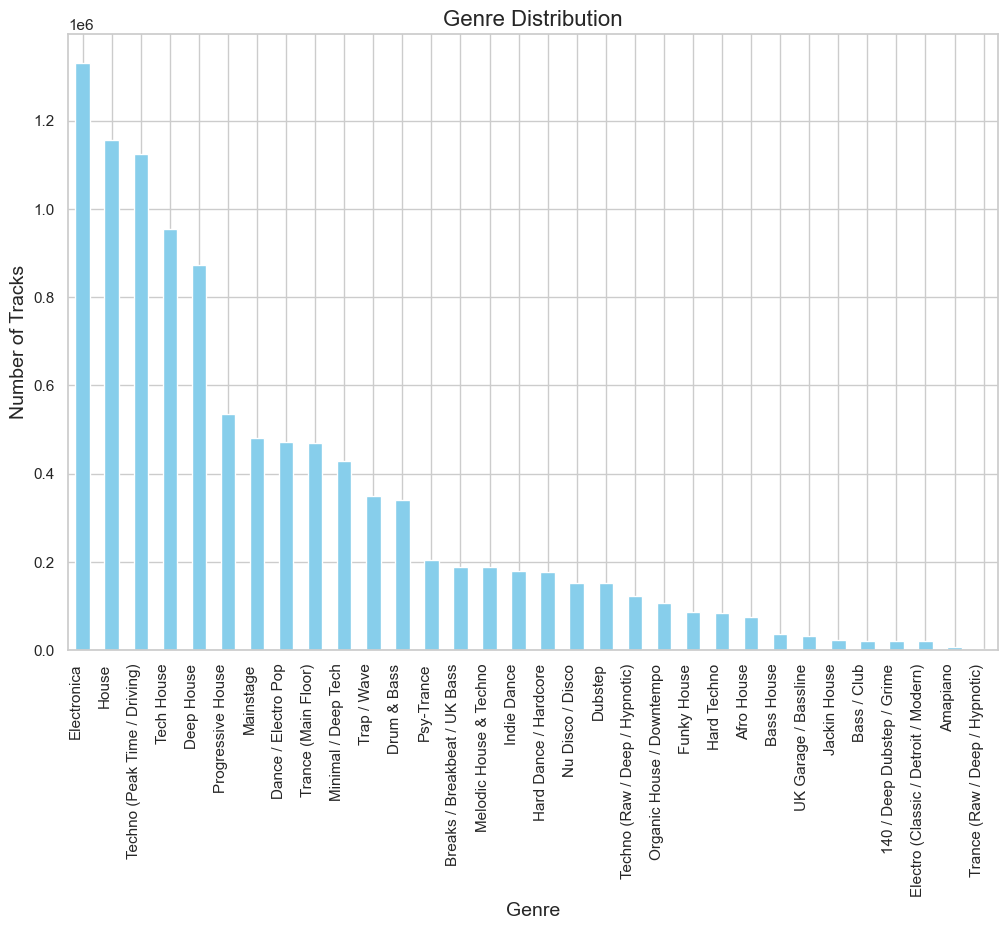

In [67]:
# visualize genre distribution including all songs as histogram
plt.figure(figsize=(12, 8))
genre_counts.plot(kind='bar', color='skyblue')


plt.title('Genre Distribution', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Number of Tracks', fontsize=14)
plt.xticks(rotation=90, ha='right') 

plt.show()


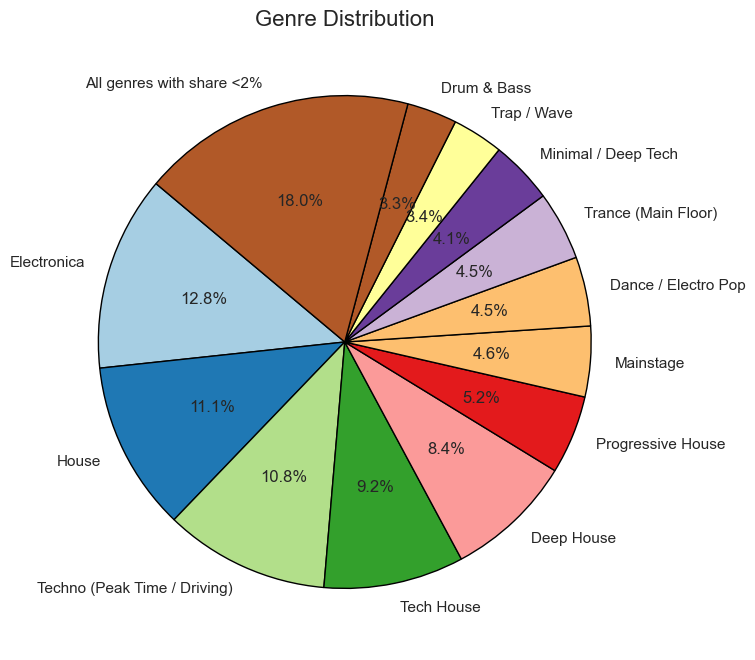

In [56]:
# visualize overall genre distribution (might be visually more appealing)
# first calculate percentage each genre contributes
total_tracks = genre_counts.sum()
genre_percentages = (genre_counts / total_tracks) * 100

# filter genres with less than 2%
small_genres = genre_percentages[genre_percentages < 2].index
large_genres = genre_percentages[genre_percentages >= 2].index

# aggregate small genres into another category
df_genre_aggregated = genre_counts.copy()
df_genre_aggregated.loc['All genres with share <2%'] = df_genre_aggregated[small_genres].sum()
df_genre_aggregated = df_genre_aggregated.drop(small_genres)


plt.figure(figsize=(10, 8))
# make sure that colors are distinct
colors = plt.cm.Paired(np.linspace(0, 1, len(df_genre_aggregated)))
plt.pie(
    df_genre_aggregated,
    labels=df_genre_aggregated.index,
    autopct='%1.1f%%',
    colors=colors,
    startangle=140,
    wedgeprops={'edgecolor': 'black'}
)

plt.title('Genre Distribution', fontsize=16)

plt.show()

**Now check if genre distribution changes if only the tracks with a match in Spotify are looked at:**

In [57]:
# filter only tracks with match in Spotify
df_filtered_tracks = df_tracks_per_genre[df_tracks_per_genre['is_matched_spot'] == True]

In [58]:
# visualize filtered tracks for comparison (sorted for better insight)
filtered_genre_counts = df_filtered_tracks['genre_name'].value_counts().sort_values(ascending=False)

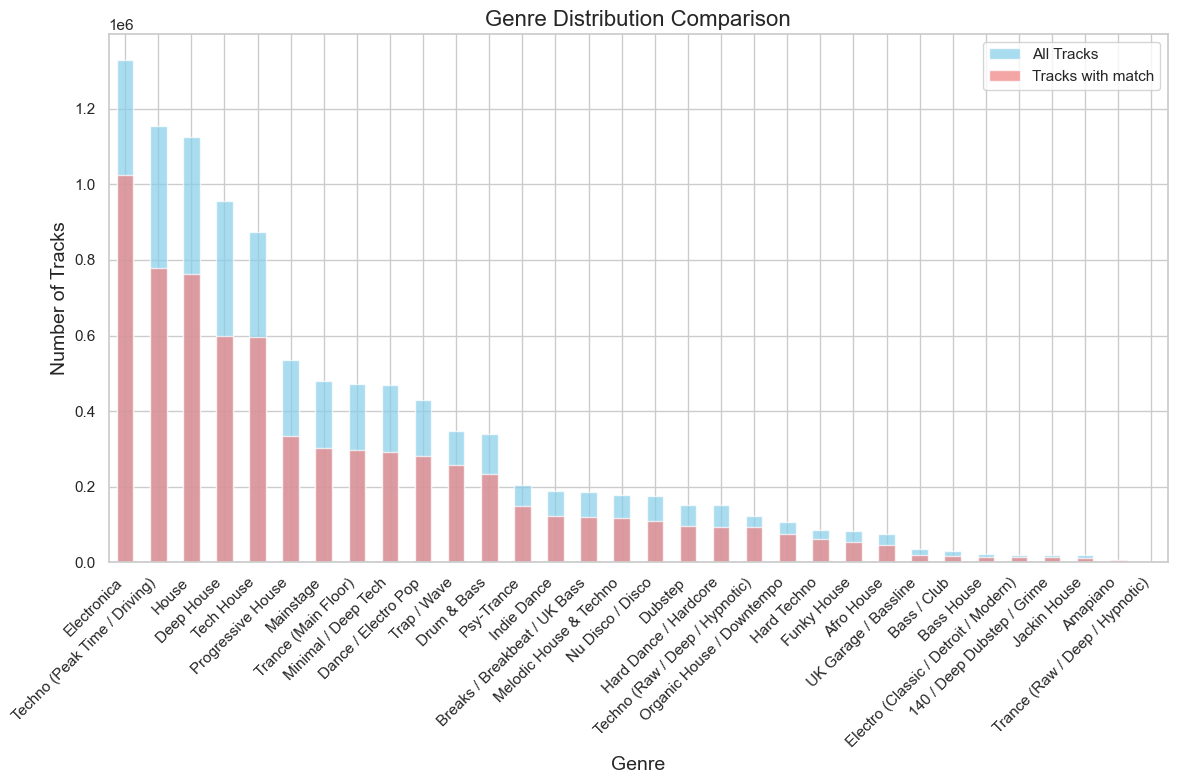

In [59]:
# now get an overview how distribution of songs per genre differs between all songs and only songs with a match in Spotify
plt.figure(figsize=(12, 8))

# plot genre_counts
genre_counts.plot(kind='bar', color='skyblue', label='All Tracks', alpha=0.7)

# plot filtered_genre_counts
filtered_genre_counts.plot(kind='bar', color='lightcoral', label='Tracks with match', alpha=0.7)


plt.title('Genre Distribution Comparison', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Number of Tracks', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()

**This shows that number of "is_matched_spot" is equally distributed troughout all genres. Most to least respresented genres stay the same.**

**This is important for later analysis to consider, when I will look at the danceability throughout songs available in Beatport. Since only those songs that have a match in Spotify have a danceability score given, it is important to know that the general distribution of genres is the same for songs with(out) matches in Spotify.**

--------------------------------------

**Data Enrichment**

**read audio_features.db into a DataFrame, this step (including the data cleansing) could be skipped and only the pickle file 'audio_features.pkl' can be read** 

In [54]:
# from sql to df
conn = sqlite3.connect(r'.\audio_features\spotify.db')

# read the table into a DataFrame
df_audio_features = pd.read_sql('SELECT * FROM audio_features', conn)

conn.close()

print(df_audio_features.head())

           isrc  acousticness  danceability  duration_ms  energy  \
0  AD4X65752184      0.906000         0.650       296733   0.350   
1  AEA0D1991170      0.000950         0.621       191989   0.639   
2  AEA0Q2004008      0.031200         0.692       282904   0.980   
3  AEA0Q2004009      0.000558         0.516       197904   0.924   
4  AEA0Q2004010      0.009380         0.587       199471   0.910   

   instrumentalness  key  liveness  loudness  mode  speechiness  tempo  \
0             0.775    3    0.1140   -11.777     1       0.0284  110.0   
1             0.820    7    0.5060    -9.258     1       0.0775  140.0   
2             0.866    9    0.0969    -9.952     1       0.0881  140.0   
3             0.434    5    0.1530   -13.564     0       0.2200  148.0   
4             0.804    0    0.5630   -10.552     1       0.0596  136.0   

   time_signature  valence  
0               4    0.336  
1               4    0.346  
2               4    0.225  
3               4    0.204  
4

------------------------------------

**Data Cleansing of df_audio_features**

In [61]:
# check for duplicates
num_duplicates = len(df_audio_features) - len(df_audio_features.drop_duplicates(keep='first'))
print(f"This df_audio_features has {num_duplicates} duplicates.")

This df_audio_features has 0 duplicates.


In [62]:
# check for Null values
null_values = df_audio_features.isnull().sum()
print(null_values)

isrc                0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64


In [63]:
# save to pickle file, so it can be easily used without always going through cleaning process again
df_audio_features.to_pickle('audio_features.pkl')
print("df_audio_features has been successfully saved as pickle file.")

df_audio_features has been successfully saved as pickle file.


In [64]:
# check whether all values are within range (given in spotify_audio_features_pdf)
df_audio_features.describe().loc[['min', 'max']]

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
min,0.000,0.0,1000.0,0.0,0.0,0.0,0.0,-60.000,0.0,0.000,0.0,0.0,0.0
max,0.996,1.0,6074945.0,1.0,1.0,11.0,1.0,5.485,1.0,0.969,250.0,5.0,1.0


**note: minimum danceability score 0.0 and maximum danceability is 1.0**

End of data cleaning df_audio_features

------------------------

Despite runtime warning it should still work and give us the result -> all values are within given range.

Delete some columns I won't need for this analysis:

In [55]:
df_audio_features.drop(['duration_ms', 'liveness', 'mode', 'time_signature'], axis=1, inplace=True)

# check
print(df_audio_features.columns)

Index(['isrc', 'acousticness', 'danceability', 'energy', 'instrumentalness',
       'key', 'loudness', 'speechiness', 'tempo', 'valence'],
      dtype='object')


In [56]:
# merge dfs to combine track, genre and danceability info
df_danceability_by_genre = df_tracks_per_genre.merge(df_audio_features, on ='isrc', how='inner')

In [57]:
print(df_danceability_by_genre.head())

   track_id          title               mix is_remixed release_date  \
0  17748952    Melancholie      Original Mix          f   2023-06-05   
1  17748950        Odyssey      Original Mix          f   2023-06-05   
2  17757742            LD5      Exos Remix 1          t   2023-06-05   
3  17346402  Twilight Rain      Extended Mix          f   2023-02-17   
4  17362707         Wander  Eli Spiral Remix          t   2023-02-13   

   genre_id  subgenre_id                                  track_url  bpm  \
0        99        264.0    beatport.com/track/melancholie/17748952  134   
1        99        264.0        beatport.com/track/odyssey/17748950  134   
2        99        264.0            beatport.com/track/ld5/17757742  150   
3        99        265.0  beatport.com/track/twilight-rain/17346402  126   
4        99        265.0         beatport.com/track/wander/17362707  124   

  duration  ...  counts acousticness  danceability  energy  instrumentalness  \
0     7:09  ...     NaN     0.

**redundant info with 'bpm' (measured by Beatport) and 'tempo' in bpm (measured by Spotify). Find out which one to keep!**

In [58]:
# bpm per genre
avg_bpm_by_genre = df_danceability_by_genre.groupby('genre_name')['bpm'].mean().reset_index()
avg_bpm_by_genre.columns = ['genre_name', 'avg_bpm']
# set 'genre_name' as the index
avg_bpm_by_genre.set_index('genre_name', inplace=True)

# check
print(avg_bpm_by_genre.head())

C:\Users\8deni\AppData\Local\Temp\ipykernel_1296\3278403507.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_bpm_by_genre = df_danceability_by_genre.groupby('genre_name')['bpm'].mean().reset_index()


                               avg_bpm
genre_name                            
140 / Deep Dubstep / Grime  116.153830
Afro House                  120.668426
Amapiano                    112.710829
Bass / Club                 117.045120
Bass House                  124.908304


In [59]:
# tempo per genre
avg_tempo_by_genre = df_danceability_by_genre.groupby('genre_name')['tempo'].mean().reset_index()
avg_tempo_by_genre.columns = ['genre_name', 'avg_tempo']
# set 'genre_name' as the index
avg_tempo_by_genre.set_index('genre_name', inplace=True)

# check
print(avg_tempo_by_genre.head())

                             avg_tempo
genre_name                            
140 / Deep Dubstep / Grime  134.554043
Afro House                  122.498742
Amapiano                    114.246634
Bass / Club                 132.661780
Bass House                  125.794307


C:\Users\8deni\AppData\Local\Temp\ipykernel_1296\3495484982.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tempo_by_genre = df_danceability_by_genre.groupby('genre_name')['tempo'].mean().reset_index()


In [70]:
# create df to compare average bpm and tempo visually
avg_bpm_vs_tempo = pd.merge(avg_bpm_by_genre, avg_tempo_by_genre, on='genre_name')
print(avg_bpm_vs_tempo.columns)

Index(['avg_bpm', 'avg_tempo'], dtype='object')


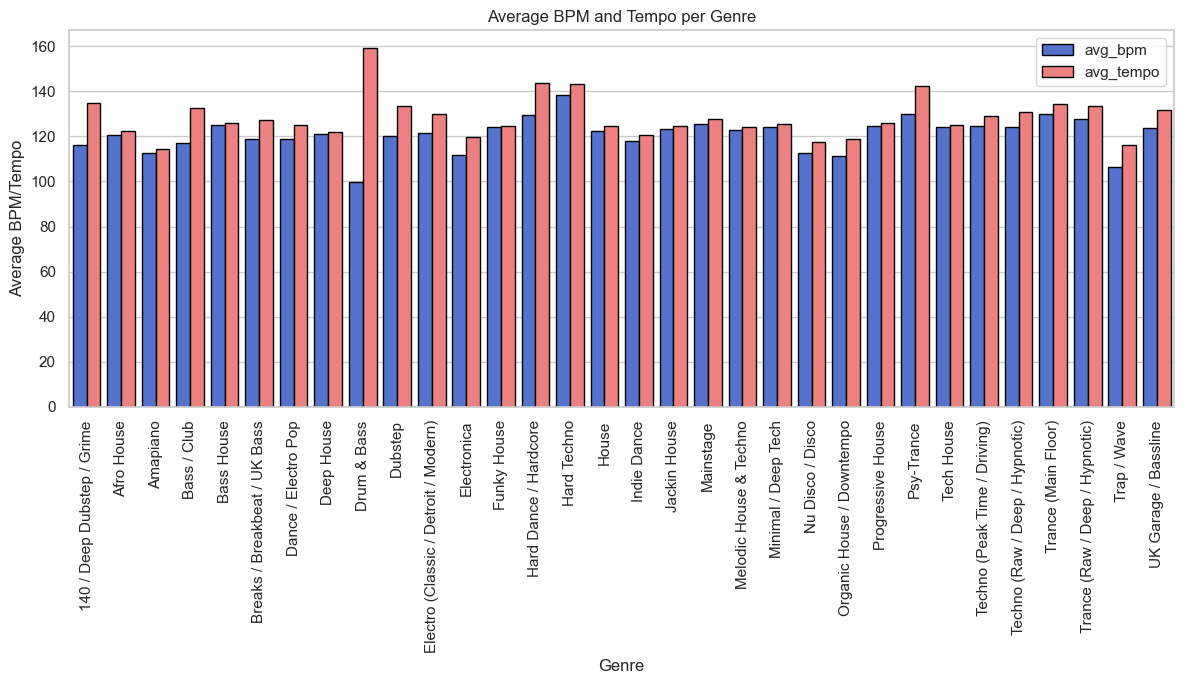

In [71]:
# visualize discrepancy between avg BPM and Tempo
# melt df to long-form
melted_df = avg_bpm_vs_tempo.melt(ignore_index=False, value_vars=['avg_bpm', 'avg_tempo'], var_name='measure', value_name='value')

plt.figure(figsize=(12, 7))

# plot with hue for side-by-side bars
ax = sns.barplot(x='genre_name', y='value', hue='measure', data=melted_df, palette={'avg_bpm': '#4169E1', 'avg_tempo': '#FF6F6F'})

for patch in ax.patches:
    patch.set_width(0.4)  
    patch.set_edgecolor('black')

plt.title('Average BPM and Tempo per Genre')
plt.xlabel('Genre')
plt.ylabel('Average BPM/Tempo')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

plt.show()

**=> avg_BPM < avg_Tempo for all genres**

**Keep tempo, BPM is not clearly defined how it should be measured (siehe spotify_audio_features.pdf)**

In [60]:
#drop column 'bpm' and use tempo values instead
df_danceability_by_genre.drop(columns=['bpm'], inplace=True)
#check, if 'bpm' column was deleted
if 'bpm' not in df_danceability_by_genre.columns:
    print("The column 'bpm' was deleted.")
else:
    print("The column 'bpm' is still present.")

The column 'bpm' was deleted.


-----------------------

------------------------------------

**Fragestellung: "Wie lässt sich das Musikangebot von Beatport bezogen auf den Danceability Score bewerten?" (engl. How does Beatport's music selection rate in terms of the Danceability Score?)**


**Analysis goes on - now specifically for this question**

**First look at overall average danceability throughout all tracks in Beatport**

In [73]:
# calculate the overall avg danceability score with SQL query, because this would be very inefficient with DataFrames
conn = sqlite3.connect(r'.\audio_features\spotify.db')

cursor = conn.cursor()
cursor.execute('SELECT AVG(danceability) FROM audio_features')
results = cursor.fetchone()

if not results:
    print("\nError.")
else:
    print("\nThe average danceability in Beatport is:")
    for row in results:
        print(row)

conn.close()


The average danceability in Beatport is:
0.6762824760129069


In [74]:
# extract the average danceability value
avg_danceability = results[0]
print(avg_danceability)

0.6762824760129069


**An average danceability score of 0.68 is quite good, regarding the fact that 0 means not danceable at all. So 0.68 leans towards the "more dancebable" side.**

--------------------

**Overall danceability score distribution throughout all tracks**

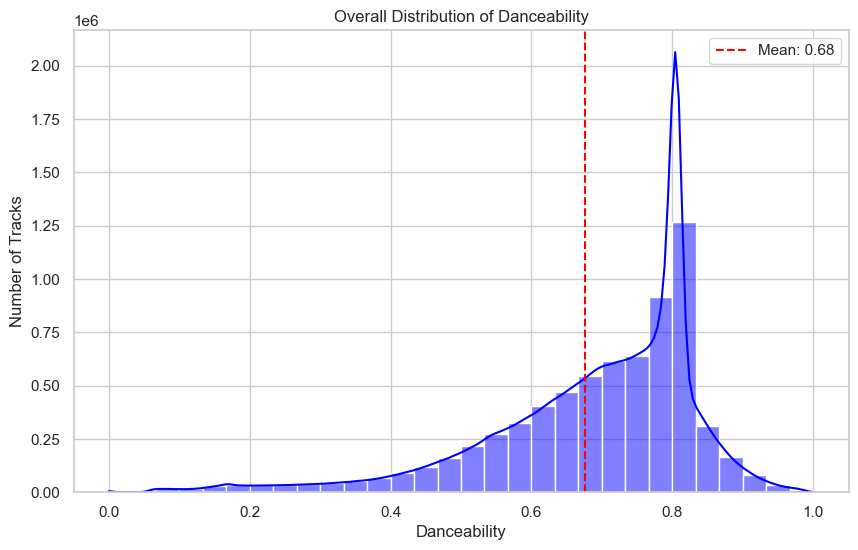

In [75]:
# depict overall danceability distribution throughout all songs of Beatport (only including those with match in Spotify)
plt.figure(figsize=(10, 6))
sns.histplot(df_danceability_by_genre['danceability'], bins=30, kde=True, color='blue')

# add the average danceability as a red line
plt.axvline(avg_danceability, color='red', linestyle='--', label=f'Mean: {avg_danceability:.2f}')

plt.title('Overall Distribution of Danceability')
plt.xlabel('Danceability')
plt.ylabel('Number of Tracks')
plt.legend()
plt.show()

**The left-skewed distribution indicates that the maximum danceability value is higher than the average. Extreme low values (maybe outliers) pull the mean (average danceability) downwards.**


**This shows that while most tracks have relatively high danceability (steeper right side), few tracks with unusually low values disproportionately affect the average. Therefore, assessing the danceability of Beatport's tracks solely by the overall average danceability may lead to an underestimation of the danceability of songs on Beatport.**

In [76]:
# check for possible "outliers" with dancebaility score = 0
conn = sqlite3.connect(r'.\audio_features\spotify.db')

cursor = conn.cursor()

cursor.execute('SELECT COUNT(*) FROM audio_features WHERE danceability = 0')
zero_danceability_count = cursor.fetchone()

if zero_danceability_count:
    print(f"\nNumber of records with danceability = 0: {zero_danceability_count[0]}")
else:
    print("\nSth went wrong.")

conn.close()


Number of records with danceability = 0: 1937


**I assume this is on purpose and not an error, however, I cannot justify whether these tracks with danceability score of 0 are not danceable at all or if there was an error when Spotify determined the value.**

--------------------------------------

**Now look at the average danceability per genre**

In [61]:
# group by 'genre' and calculate the average 'danceability' per genre
avg_danceability_by_genre = df_danceability_by_genre.groupby('genre_name')['danceability'].mean().reset_index()
avg_danceability_by_genre.columns = ['genre_name', 'avg_danceability']
# sort by avg_danceability for visualization
avg_danceability_by_genre = avg_danceability_by_genre.sort_values(by='avg_danceability', ascending=True)
print(avg_danceability_by_genre.tail())


             genre_name  avg_danceability
4            Bass House          0.789702
25           Tech House          0.790846
2              Amapiano          0.791637
20  Minimal / Deep Tech          0.794008
17         Jackin House          0.801785


C:\Users\8deni\AppData\Local\Temp\ipykernel_1296\238456767.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_danceability_by_genre = df_danceability_by_genre.groupby('genre_name')['danceability'].mean().reset_index()


In [62]:
# set 'genre_name' as the index
avg_danceability_by_genre.set_index('genre_name', inplace=True)

# check
print(avg_danceability_by_genre.head())

                       avg_danceability
genre_name                             
Electronica                    0.572768
Drum & Bass                    0.581265
Hard Dance / Hardcore          0.590810
Trance (Main Floor)            0.591966
Dubstep                        0.607815


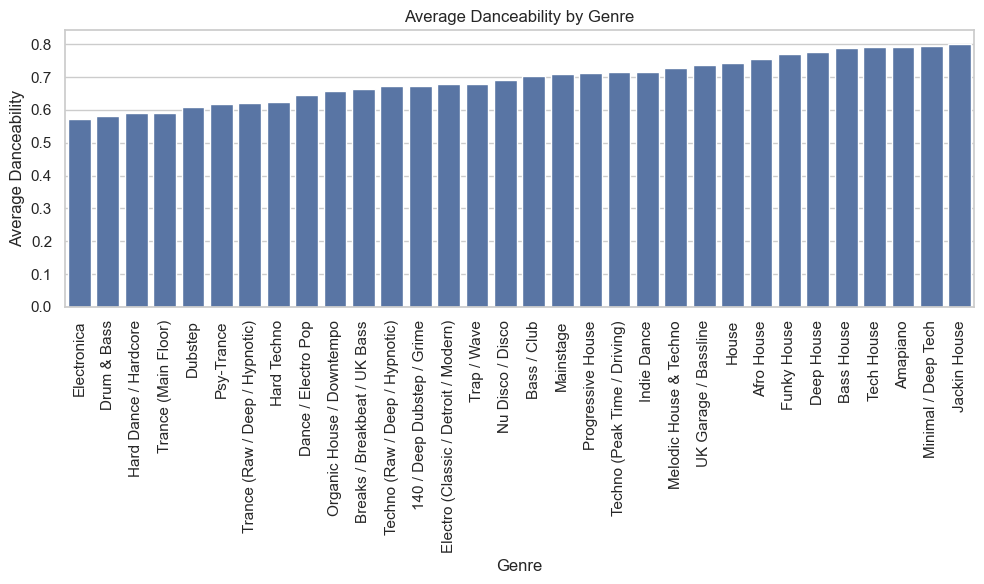

In [66]:
# visualize the average danceability score per genre
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_danceability_by_genre.index, y='avg_danceability', data=avg_danceability_by_genre,  order=avg_danceability_by_genre.index)

plt.title('Average Danceability by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Danceability')
plt.xticks(rotation=90)  
plt.tight_layout()

plt.show()

In [80]:
print(avg_danceability_by_genre.describe())

       avg_danceability
count         32.000000
mean           0.693704
std            0.069834
min            0.572768
25%            0.639803
50%            0.696472
75%            0.745668
max            0.801785


**The minimal avergae danceability value per genre is 0.57 (Electronica) which is quite good. Beatport seems to fulfill it's claim of being a service for dance music.**

**The max average danceability value per genre is 0.80 (Jackin House).**

There is no genre with an average danceability of 1.0.  

-------------------------------

**Define songs with a danceability score of >=80% as highly danceable because it is the maximum average danceability occuring per genre.**

-------------------

**Distribution of Tracks throughout defined categories:**

In [84]:
# convert 'danceability' column to float32 if it’s not already
df_danceability_by_genre['danceability'] = df_danceability_by_genre['danceability'].astype('float32')

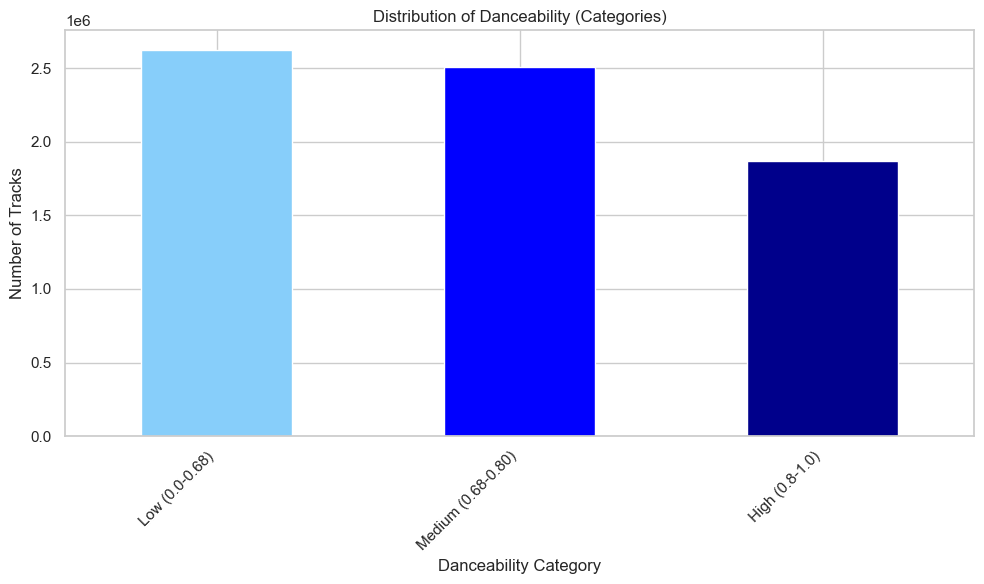

In [85]:
# depict danceability distribution in categories by tracks
bins = [0.0, 0.68, 0.80, 1.0]
labels = ['Low (0.0-0.68)', 'Medium (0.68-0.80)', 'High (0.8-1.0)'] 
df_danceability_by_genre['danceability_category'] = pd.cut(df_danceability_by_genre['danceability'], bins=bins, labels=labels, right=False) #do not include the right edge

plt.figure(figsize=(10, 6))
colors = ['LightSkyBlue', 'Blue', 'darkblue']
df_danceability_by_genre['danceability_category'].value_counts().sort_index().plot(kind='bar', color=colors)

plt.title('Distribution of Danceability (Categories)')
plt.xlabel('Danceability Category')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

**Choose mean = 0.68 as lower bound for "medium" and 0.80 as upper bound because this is the maximum average danceability per genre**

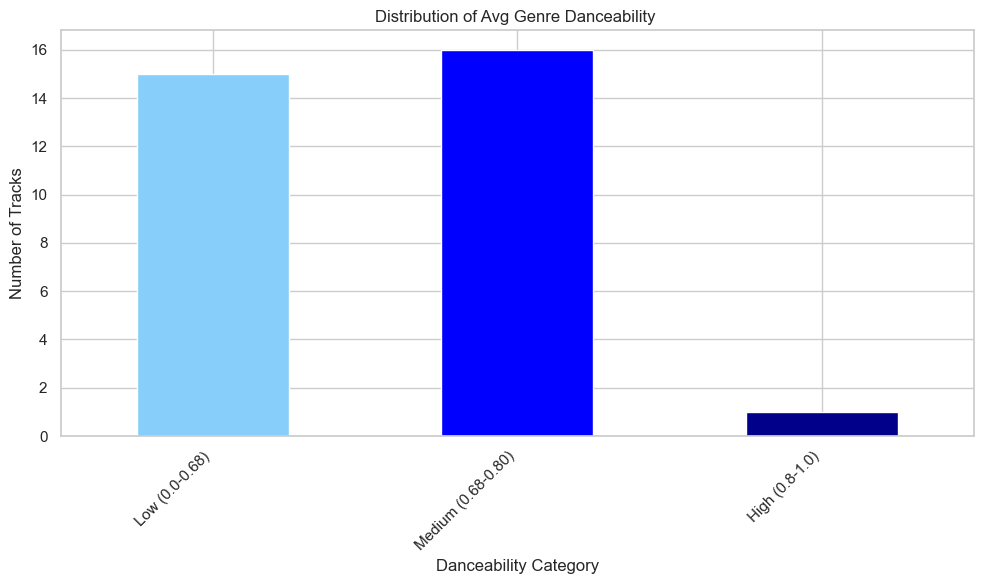

In [87]:
# depict 'avg danceability by genre' distribution in categories => By Genre
bins = [0.0, 0.68, 0.80, 1.0]
labels = ['Low (0.0-0.68)', 'Medium (0.68-0.80)', 'High (0.8-1.0)'] 
avg_danceability_by_genre['danceability_category'] = pd.cut(avg_danceability_by_genre['avg_danceability'], bins=bins, labels=labels, right=False) #do not include the right edge

plt.figure(figsize=(10, 6))
colors = ['LightSkyBlue', 'Blue', 'darkblue']
avg_danceability_by_genre['danceability_category'].value_counts().sort_index().plot(kind='bar', color=colors)

plt.title('Distribution of Avg Genre Danceability ')
plt.xlabel('Danceability Category')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

**=> most genres have a 'medium' average danceability [0.68, 0.8). However there nearly as much genres with a low average danceability**

----------------------------

**Visualize average danceability of all tracks available in Beatport over time (release_year)**

In [88]:
# in regard to release_date
df_release = dataframes['df_release']
df_release = df_release[['release_id', 'release_date']]
# extract the release year
df_release.loc[:, 'year'] = df_release['release_date'].dt.year
print(df_release.head(3))

   release_id release_date  year
0     4141705   2023-06-09  2023
1     4144460   2023-06-09  2023
2     4153005   2023-06-06  2023


C:\Users\8deni\AppData\Local\Temp\ipykernel_18076\3663078811.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_release.loc[:, 'year'] = df_release['release_date'].dt.year


In [89]:
df_track = dataframes['df_track']
# delete some columns that won't be needed for this analysis
df_track.drop(['mix', 'is_remixed', 'track_url', 'duration', 'updated_on'], axis=1, inplace=True)

# check
print(df_track.columns)

Index(['track_id', 'title', 'release_date', 'genre_id', 'bpm', 'duration_ms',
       'isrc', 'key_id', 'label_id', 'release_id', 'is_matched_spot'],
      dtype='object')


In [90]:
# merge on release_id to match tracks with release_date
df_track_release = pd.merge(df_track, df_release, on='release_id', how='inner')

In [91]:
# only keep the columns needed for the visualization
df_audio_features_reduced = df_audio_features[['isrc', 'danceability']]

In [92]:
# merge with audio_features to match with danceability score
df_track_release_dance = pd.merge(df_track_release, df_audio_features_reduced, on='isrc', how='inner')

In [93]:
average_danceability_per_year = df_track_release_dance.groupby('year')['danceability'].mean().reset_index()
print(average_danceability_per_year.describe().loc[['min', 'max']]) 


       year  danceability
min  1900.0      0.156225
max  2023.0      0.704200


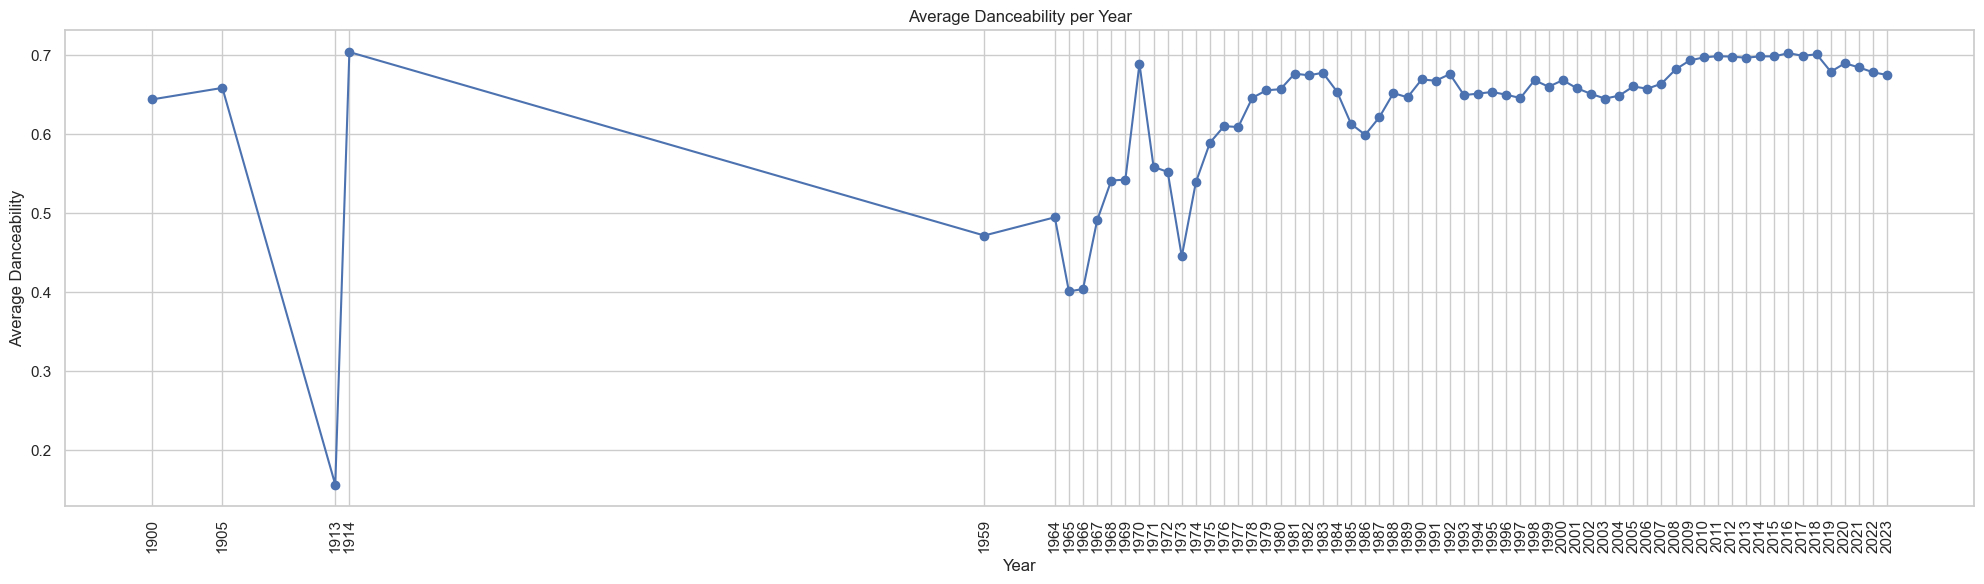

In [94]:
# show avg danceability over the years
plt.figure(figsize= (20, 6))
plt.plot(average_danceability_per_year['year'], average_danceability_per_year['danceability'], marker='o', linestyle='-')
plt.title('Average Danceability per Year')
plt.xlabel('Year')
plt.ylabel('Average Danceability')
plt.grid(True)
plt.xticks(average_danceability_per_year['year'], rotation=90)  
plt.tight_layout()
plt.show()

In [95]:
# check how many songs there are in the earliest years
df_track_release_dance_filtered = df_track_release_dance[df_track_release_dance['year'] == 1900]
count = df_track_release_dance_filtered.shape[0]
print(f"There are {count} songs released in 1900.")

df_track_release_dance_filtered = df_track_release_dance[df_track_release_dance['year'] == 1905]
count = df_track_release_dance_filtered.shape[0]
print(f"There are {count} songs released in 1905.")

df_track_release_dance_filtered = df_track_release_dance[df_track_release_dance['year'] == 1913]
count = df_track_release_dance_filtered.shape[0]
print(f"There are {count} songs released in 1913.")

df_track_release_dance_filtered = df_track_release_dance[df_track_release_dance['year'] == 1914]
count = df_track_release_dance_filtered.shape[0]
print(f"There are {count} songs released in 1914.")

df_track_release_dance_filtered = df_track_release_dance[df_track_release_dance['year'] == 1959]
count = df_track_release_dance_filtered.shape[0]
print(f"There are {count} songs released in 1959.")

There are 20 songs released in 1900.
There are 9 songs released in 1905.
There are 4 songs released in 1913.
There are 20 songs released in 1914.
There are 21 songs released in 1959.


In [96]:
# delete them, for a clear visualization
years_to_remove = [1900, 1905, 1913, 1914, 1959]
df_track_release_dance = df_track_release_dance[~df_track_release_dance['year'].isin(years_to_remove)]

# check
df_track_release_dance_filtered = df_track_release_dance[df_track_release_dance['year'] == 1959]
count = df_track_release_dance_filtered.shape[0]
print(f"There are {count} songs released in 1959.")

There are 0 songs released in 1959.


In [97]:
# group filtered df
average_danceability_per_year = df_track_release_dance.groupby('year')['danceability'].mean().reset_index()
print(average_danceability_per_year.describe().loc[['min', 'max']]) 

       year  danceability
min  1964.0      0.401000
max  2023.0      0.702837


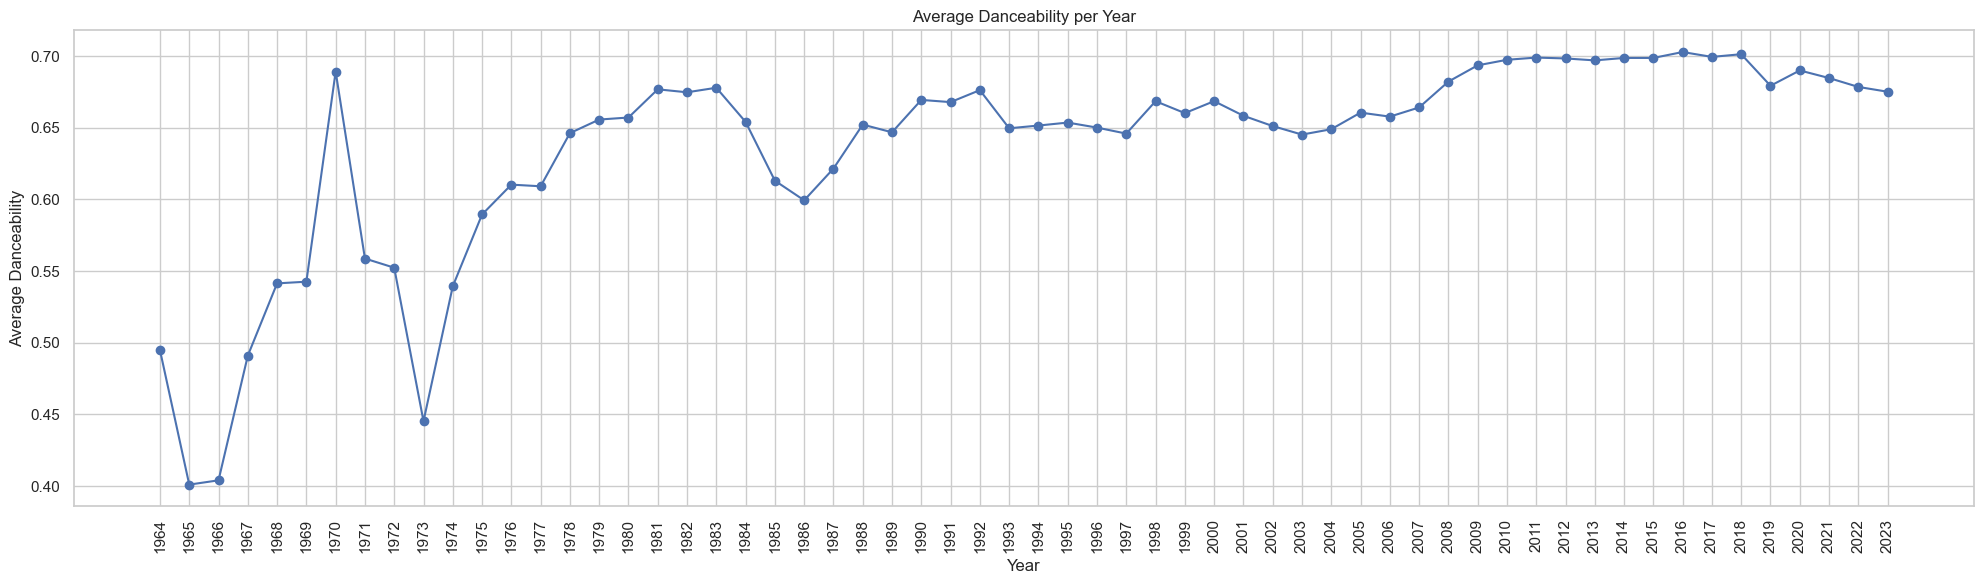

In [98]:
# show avg danceability over the years (starting in 1964 because earlier only few tracks available on Beatport)
plt.figure(figsize= (20, 6))
plt.plot(average_danceability_per_year['year'], average_danceability_per_year['danceability'], marker='o', linestyle='-')
plt.title('Average Danceability per Year')
plt.xlabel('Year')
plt.ylabel('Average Danceability')
plt.grid(True)
plt.xticks(average_danceability_per_year['year'], rotation=90)  
plt.tight_layout()
plt.show()

---------------

**Regression Analysis**

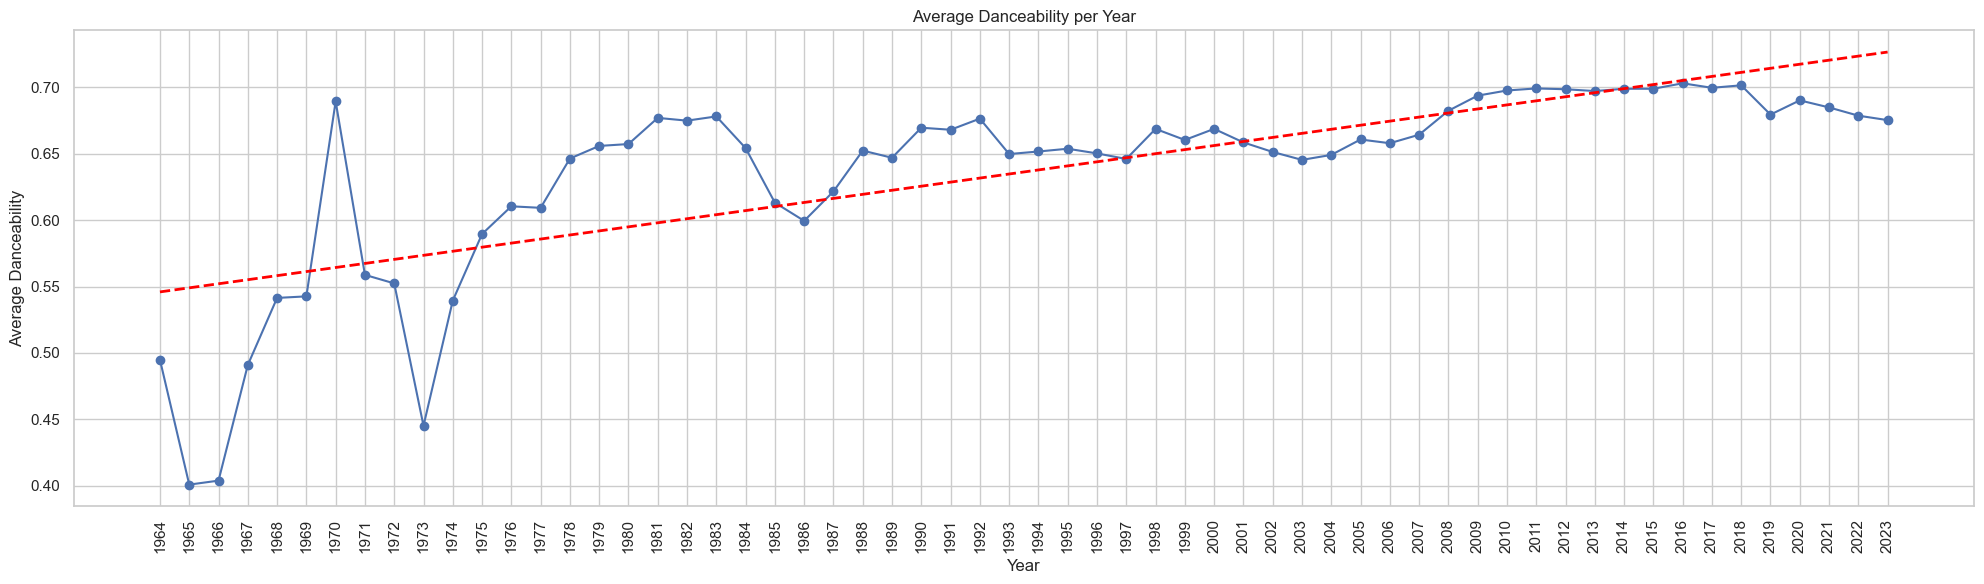

In [99]:
from sklearn.linear_model import LinearRegression

# show avg danceability over the years, include regression 

X = average_danceability_per_year[['year']].values  
y = average_danceability_per_year['danceability'].values  

# fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# predict values
y_pred = model.predict(X)
plt.figure(figsize= (20, 6))
plt.plot(average_danceability_per_year['year'], average_danceability_per_year['danceability'], marker='o', linestyle='-')

# include regression line in visualization
plt.plot(average_danceability_per_year['year'], y_pred, color='red', linestyle='--', linewidth=2, label='Trend Line')
plt.title('Average Danceability per Year')
plt.xlabel('Year')
plt.ylabel('Average Danceability')
plt.grid(True)
plt.xticks(average_danceability_per_year['year'], rotation=90)  
plt.tight_layout()
plt.show()

**Evaluate model**

In [100]:
from sklearn.metrics import mean_squared_error, r2_score

# R-squared
r2 = r2_score(y, y_pred)

# Mean Squared Error 
mse = mean_squared_error(y, y_pred)

# Root Mean Squared Error 
rmse = np.sqrt(mse)

print(f"R-squared: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

R-squared: 0.5540482407478835
MSE: 0.0022569246594508164
RMSE: 0.04750710114762651


R^2 value shows that only 55.4% of the variance in the target variable is explained by the model. The model does not yet underfit the data (meaning it is too simple to capture any underlaying pattern and does not generalize), however 55% of variance captured is still imprecise. 

MSE: With a MSE 0.23%, the average squared difference between the actual and predicted value is quite low. However, this can not solely be an indication of the model's precision.

RMSE: Since the target variable (danceability) is quite small (between 0 and 1) the RMSE value of 0.048 is ok. Relatively compared to the mean of 0.68: 0.048/0.69=0.070. So on average the model's prediction error is less than 7% of the mean. => 7% * mean = 0.05: the regression line differs in 0.05 (danceability) on average.  

**As the model shows the danceability trend seems to contionously grow, however for further, more detailed predictions the regression model must be improved!**

For the model refinement audio features could be included. Moreover, the distribution of genres and artists over the years as well as non-linear relations could be explored.

(One idea would be to find out which audio feature has the greatest influence on the decision on how danceable a track is. Here a Random Forest Algorithm could be implemented to than calculate the feature importance -> highest Impurity Decrease = most influential for decision making process)

------------------------

**Average danceability score of 0.68 already quite high.**

**Overall: 20% Tracks in Beatport are highly danceable (>0.80 in danceability).**

**Biggest part of tracks is still medium danceabile [0.68-0.80).**

**Analysis shows Beatport already offers an outstanding range of music, with variaty in medium to highly danceable genres!**

For the future it would be interesting to find out what users experience as most danceable (through surveys, ratings in the App e.g "how danceable was this track") to offer and improve the user's experience.

Since Beatport is a service for "Elektronische Tanzmusik" Beatport could create its own algorithm using domain knowledge about what makes "Elektronische Tanzmusik" most danceable.

-----------------

Further analysis steps that are only related to the Fragestellung:

------------------------------

--------------------------

**To look at what "danceability" might mean, I'll look at some feature and how thy might influence the danceability score**

In [101]:
# select some features
features_to_scale = ['acousticness', 'danceability', 'energy', 'loudness', 'instrumentalness', 'speechiness', 'valence']

# initialize the MinMaxScaler
scaler = MinMaxScaler()

# apply Min-Max Scaling to selected features
df_scaled = df_audio_features.copy()
df_scaled[features_to_scale] = scaler.fit_transform(df_audio_features[features_to_scale])

print(df_scaled[features_to_scale].head())

   acousticness  danceability  energy  loudness  instrumentalness  \
0      0.909639         0.650   0.350  0.736398             0.775   
1      0.000954         0.621   0.639  0.774864             0.820   
2      0.031325         0.692   0.980  0.764267             0.866   
3      0.000560         0.516   0.924  0.709109             0.434   
4      0.009418         0.587   0.910  0.755104             0.804   

   speechiness  valence  
0     0.029309    0.336  
1     0.079979    0.346  
2     0.090918    0.225  
3     0.227038    0.204  
4     0.061507    0.321  


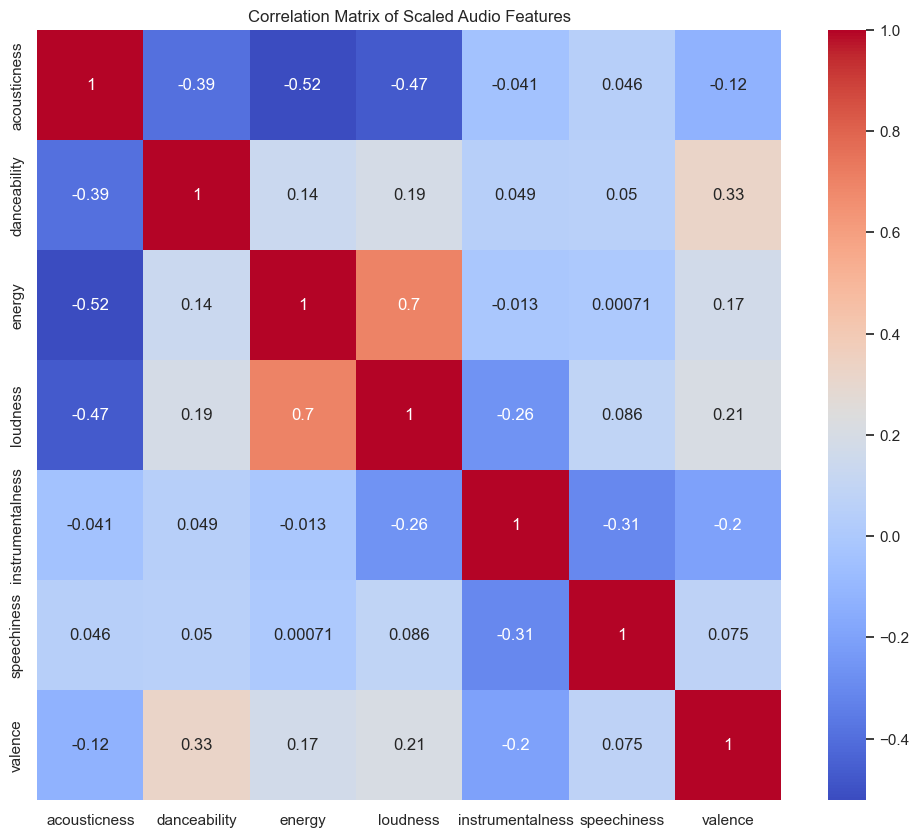

In [102]:
# plot the correlation matrix of min-max scaled features

plt.figure(figsize=(12, 10))
corr = df_scaled[features_to_scale].corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix of Scaled Audio Features')
plt.show()


**valence-dancability 0.33, acousticness-danceability -0.39: based on correlation visualize 'all tracks regarding tempo vs danceability', 'avg valence values vs avg danceability per genre' and 'avg acousticness vs danceability per genre'**

Look at valence, acousticness and tempo (explanation of danceability in spotify_audio_features.pdf)

**Tempo-Danceability:**

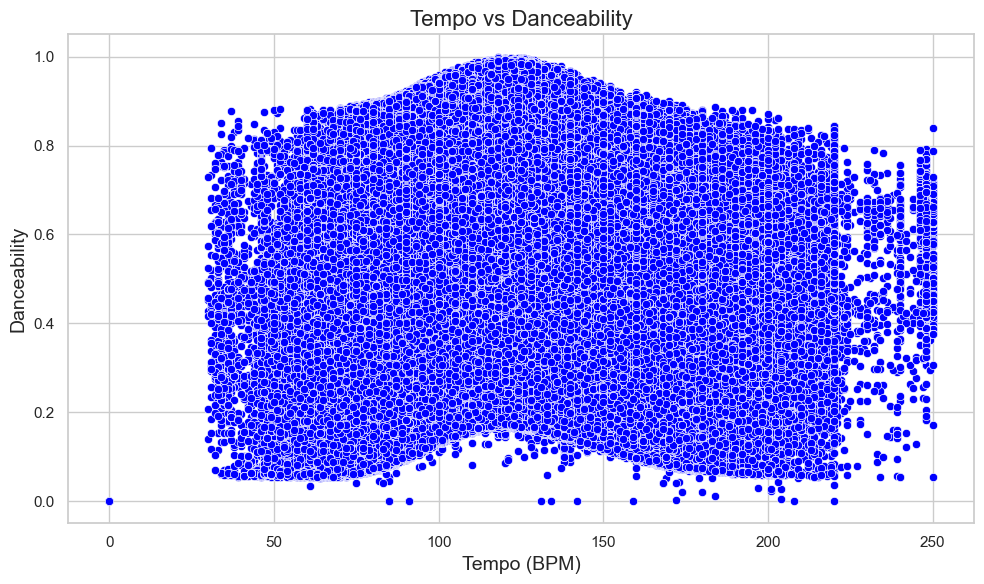

In [103]:
# create a scatterplot that shows all tracks regarding tempo and danceability
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tempo', y='danceability', data=df_danceability_by_genre, color='blue')

plt.title('Tempo vs Danceability', fontsize=16)
plt.xlabel('Tempo (BPM)', fontsize=14)
plt.ylabel('Danceability', fontsize=14)

plt.tight_layout()
plt.show()

**Clustering won't work here, at least not in this dimension, maybe if more features (-> more dimensions) are considered it might work.**

**Acousticness-Danceability:**

In [104]:
# now visualize  acousticness-danceability
avg_acousticness_by_genre = df_danceability_by_genre.groupby('genre_name')['acousticness'].mean().reset_index()

# check
print(avg_acousticness_by_genre.head())

C:\Users\8deni\AppData\Local\Temp\ipykernel_18076\987627154.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_acousticness_by_genre = df_danceability_by_genre.groupby('genre_name')['acousticness'].mean().reset_index()


                   genre_name  acousticness
0  140 / Deep Dubstep / Grime      0.102820
1                  Afro House      0.055837
2                    Amapiano      0.069697
3                 Bass / Club      0.075630
4                  Bass House      0.026209


In [105]:
avg_acousticness_by_genre.rename(columns={'acousticness': 'avg_acousticness'}, inplace=True)

# check
print(avg_acousticness_by_genre.head())

                   genre_name  avg_acousticness
0  140 / Deep Dubstep / Grime          0.102820
1                  Afro House          0.055837
2                    Amapiano          0.069697
3                 Bass / Club          0.075630
4                  Bass House          0.026209


In [106]:
# reset the index so 'genre_name' becomes a column, for visualization
avg_tempo_by_genre_reset = avg_tempo_by_genre.reset_index()
avg_danceability_by_genre_reset = avg_danceability_by_genre.reset_index()

In [107]:
avg_danceability_vs_acousticness_by_genre = pd.merge(avg_acousticness_by_genre, avg_danceability_by_genre_reset, on='genre_name')

In [108]:
# check
print(avg_danceability_vs_acousticness_by_genre.head())

                   genre_name  avg_acousticness  avg_danceability  \
0  140 / Deep Dubstep / Grime          0.102820          0.672177   
1                  Afro House          0.055837          0.754269   
2                    Amapiano          0.069697          0.791637   
3                 Bass / Club          0.075630          0.702801   
4                  Bass House          0.026209          0.789702   

  danceability_category  
0        Low (0.0-0.68)  
1    Medium (0.68-0.80)  
2    Medium (0.68-0.80)  
3    Medium (0.68-0.80)  
4    Medium (0.68-0.80)  


In [109]:
# scale the data to compare it
scaler = MinMaxScaler()

avg_danceability_vs_acousticness_by_genre[['avg_acousticness_scaled', 'avg_danceability_scaled']] = scaler.fit_transform(avg_danceability_vs_acousticness_by_genre[['avg_acousticness', 'avg_danceability']])

In [110]:
print(avg_danceability_vs_acousticness_by_genre.head())

                   genre_name  avg_acousticness  avg_danceability  \
0  140 / Deep Dubstep / Grime          0.102820          0.672177   
1                  Afro House          0.055837          0.754269   
2                    Amapiano          0.069697          0.791637   
3                 Bass / Club          0.075630          0.702801   
4                  Bass House          0.026209          0.789702   

  danceability_category  avg_acousticness_scaled  avg_danceability_scaled  
0        Low (0.0-0.68)                 0.301478                 0.434066  
1    Medium (0.68-0.80)                 0.135139                 0.792522  
2    Medium (0.68-0.80)                 0.184211                 0.955686  
3    Medium (0.68-0.80)                 0.205215                 0.567786  
4    Medium (0.68-0.80)                 0.030246                 0.947239  


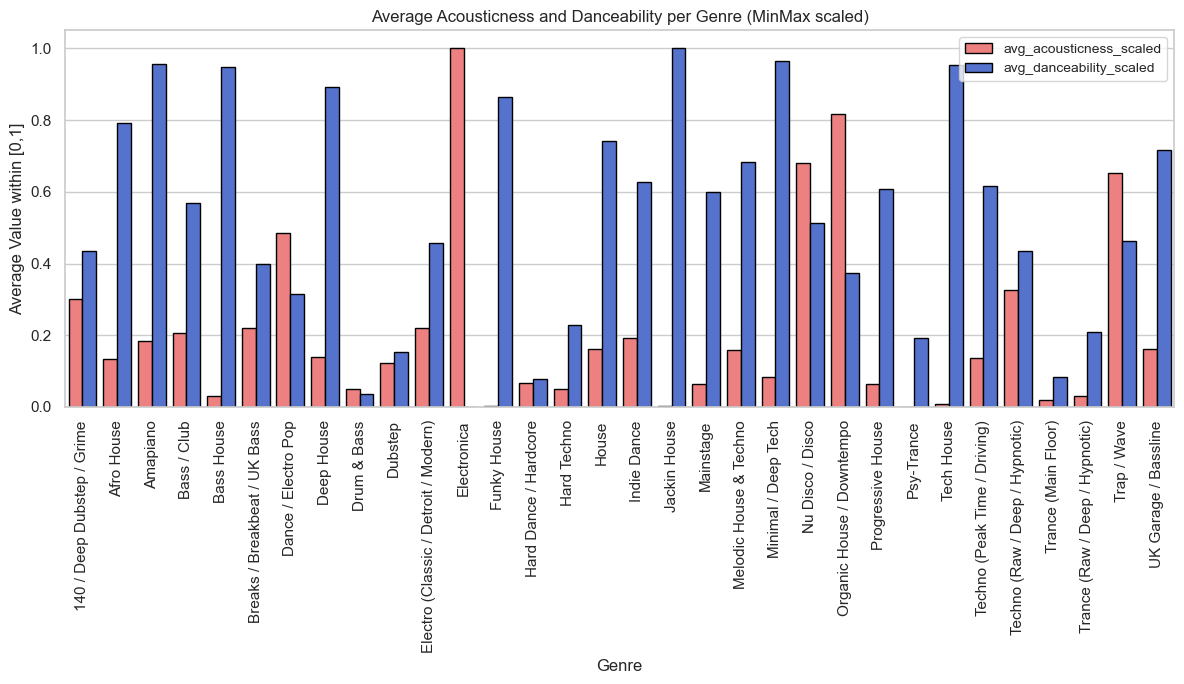

In [111]:
# display avg acousticness per genre and avg danceability per genre

melted_df = avg_danceability_vs_acousticness_by_genre.melt(id_vars='genre_name', value_vars=['avg_acousticness_scaled', 'avg_danceability_scaled'], var_name='measure', value_name='value')

sorted_genres = avg_danceability_vs_acousticness_by_genre.sort_values(by='avg_danceability_scaled')['genre_name']
melted_df['genre_name'] = pd.Categorical(melted_df['genre_name'], categories=sorted_genres, ordered=True)
melted_df = melted_df.sort_values(by='genre_name')


# side-by-side bars
plt.figure(figsize=(12, 7))
ax = sns.barplot(x='genre_name', y='value', hue='measure', data=melted_df, palette={'avg_acousticness_scaled': '#FF6F6F', 'avg_danceability_scaled': '#4169E1'})

for patch in ax.patches:
    patch.set_width(0.4)  
    patch.set_edgecolor('black')

plt.title('Average Acousticness and Danceability per Genre (MinMax scaled)')
plt.xlabel('Genre')
plt.ylabel('Average Value within [0,1]')
plt.xticks(rotation=90)
plt.legend(fontsize='small')
plt.tight_layout()

plt.show()

**Valence-Danceability:**

In [112]:
avg_valence_by_genre = df_danceability_by_genre.groupby('genre_name')['valence'].mean().reset_index()

# check 
print(avg_valence_by_genre.head())

C:\Users\8deni\AppData\Local\Temp\ipykernel_18076\2779580439.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_valence_by_genre = df_danceability_by_genre.groupby('genre_name')['valence'].mean().reset_index()


                   genre_name   valence
0  140 / Deep Dubstep / Grime  0.298658
1                  Afro House  0.422842
2                    Amapiano  0.409733
3                 Bass / Club  0.477050
4                  Bass House  0.492721


In [113]:
avg_valence_by_genre.rename(columns={'valence': 'avg_valence'}, inplace=True)

# check
print(avg_valence_by_genre.head())

                   genre_name  avg_valence
0  140 / Deep Dubstep / Grime     0.298658
1                  Afro House     0.422842
2                    Amapiano     0.409733
3                 Bass / Club     0.477050
4                  Bass House     0.492721


In [114]:
avg_danceability_vs_valence_by_genre = pd.merge(avg_valence_by_genre, avg_danceability_by_genre_reset, on='genre_name')

In [115]:
print(avg_danceability_vs_valence_by_genre.head())

                   genre_name  avg_valence  avg_danceability  \
0  140 / Deep Dubstep / Grime     0.298658          0.672177   
1                  Afro House     0.422842          0.754269   
2                    Amapiano     0.409733          0.791637   
3                 Bass / Club     0.477050          0.702801   
4                  Bass House     0.492721          0.789702   

  danceability_category  
0        Low (0.0-0.68)  
1    Medium (0.68-0.80)  
2    Medium (0.68-0.80)  
3    Medium (0.68-0.80)  
4    Medium (0.68-0.80)  


In [116]:
# scale the data to compare it
scaler = MinMaxScaler()

avg_danceability_vs_valence_by_genre[['avg_valence_scaled', 'avg_danceability_scaled']] = scaler.fit_transform(avg_danceability_vs_valence_by_genre[['avg_valence', 'avg_danceability']])

In [117]:
print(avg_danceability_vs_valence_by_genre.head())

                   genre_name  avg_valence  avg_danceability  \
0  140 / Deep Dubstep / Grime     0.298658          0.672177   
1                  Afro House     0.422842          0.754269   
2                    Amapiano     0.409733          0.791637   
3                 Bass / Club     0.477050          0.702801   
4                  Bass House     0.492721          0.789702   

  danceability_category  avg_valence_scaled  avg_danceability_scaled  
0        Low (0.0-0.68)            0.121476                 0.434066  
1    Medium (0.68-0.80)            0.438969                 0.792522  
2    Medium (0.68-0.80)            0.405453                 0.955686  
3    Medium (0.68-0.80)            0.577557                 0.567786  
4    Medium (0.68-0.80)            0.617623                 0.947239  


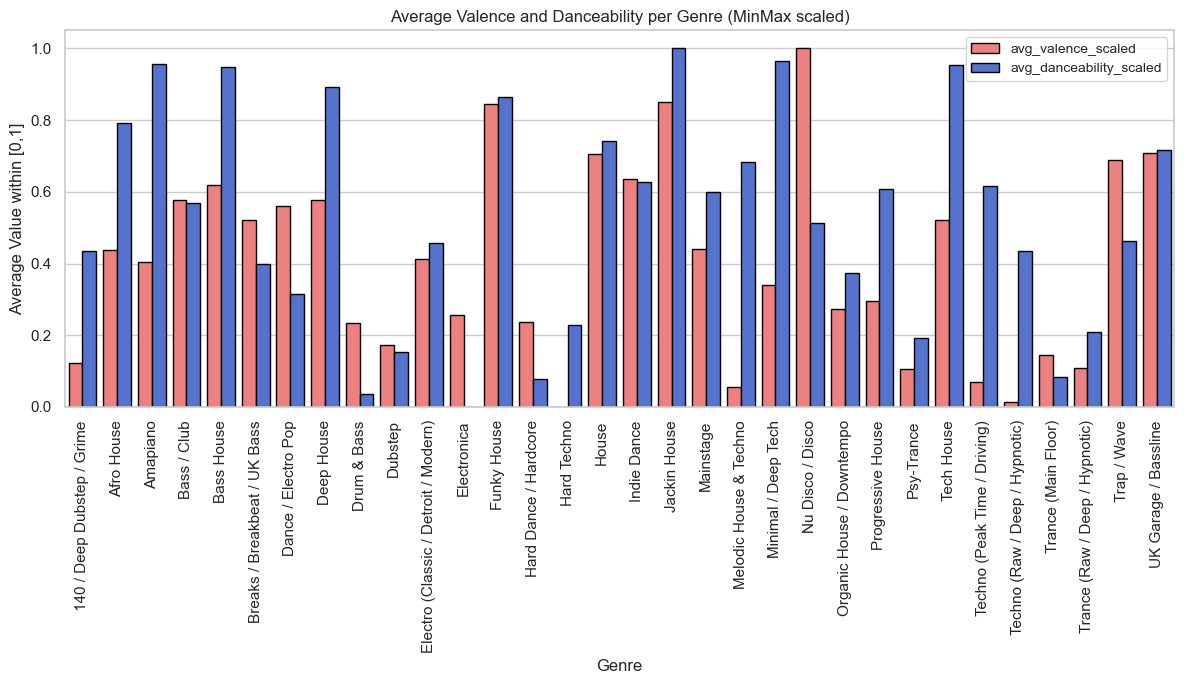

In [118]:
# display avg Valence per genre and avg danceability per genre

# melt df  to long-form for easier plotting
melted_df = avg_danceability_vs_valence_by_genre.melt(id_vars='genre_name', value_vars=['avg_valence_scaled', 'avg_danceability_scaled'], 
                           var_name='measure', value_name='value')

sorted_genres = avg_danceability_vs_valence_by_genre.sort_values(by='avg_danceability_scaled')['genre_name']
melted_df['genre_name'] = pd.Categorical(melted_df['genre_name'], categories=sorted_genres, ordered=True)
melted_df = melted_df.sort_values(by='genre_name')


# side-by-side bars
plt.figure(figsize=(12, 7))
ax = sns.barplot(x='genre_name', y='value', hue='measure', data=melted_df, palette={'avg_valence_scaled': '#FF6F6F', 'avg_danceability_scaled': '#4169E1'})


for patch in ax.patches:
    patch.set_width(0.4)  
    patch.set_edgecolor('black')

plt.title('Average Valence and Danceability per Genre (MinMax scaled)')
plt.xlabel('Genre')
plt.ylabel('Average Value within [0,1]')
plt.xticks(rotation=90)
plt.legend(fontsize='small')
plt.tight_layout()

plt.show()

**These show that some features might influence danceability. However, a more complex analysis (e.g RandomForest Classifier) must be performed in order to better understand the dependency of danceability and these features. In order to understand "Danceability" better Beatport could further analyse which audio features influence danceability the most (e.g use feature engineering to find non-linear relations) and which audio features are most important for their users in order for them to experience a track as highly danceable.**

--------------